In [12]:
import torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


train_data = torchvision.datasets.MNIST("./", train=True,
                                        transform=torchvision.transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST("./", train=False,
                                       transform=torchvision.transforms.ToTensor(), download=True)

batch_size = 64
# Create data loaders.
train_dataloader = DataLoader(train_data, shuffle = True)#, batch_size=batch_size)
test_dataloader = DataLoader(test_data)#, batch_size=batch_size)

for X, y in (test_dataloader):
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([1, 1, 28, 28])
Shape of y: torch.Size([1]) torch.int64


In [6]:
# use cpu or gpu device if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model

class FNeuralNetwork(nn.Module):
    def __init__(self):
        super(FNeuralNetwork, self).__init__()
        self.conv_net_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28*1, 256),  #(w x h x c, output_dim). nn.Linear gives fully connected layers. 
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        logits = self.conv_net_stack(x)
        return logits



class CNeuralNetwork(nn.Module):
    def __init__(self):
        super(CNeuralNetwork, self).__init__()
        self.conv_net_stack = nn.Sequential(
            nn.Conv2d(1, 12, (3, 3), 1), #in channels, out channels, kernel size, stride
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Conv2d(12, 10, (3, 3), 1),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Flatten(),
            nn.Linear(250, 100), #(w x h x c, output_dim)
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )
        

    def forward(self, x):
        logits = self.conv_net_stack(x)
        return logits

    
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Using cpu device


In [17]:
model_FNN = FNeuralNetwork().to(device)
model_CNN = CNeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(model_FNN.parameters(), lr=1e-3)
optimizer2 = torch.optim.SGD(model_CNN.parameters(), lr=1e-3)

In [18]:
torch.manual_seed(0)
epochs = 100#200
for t in range(epochs):
    start = time.time()
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_FNN, loss_fn, optimizer1)
    test(test_dataloader, model_FNN, loss_fn)
    print(f'Epoch ran in {time.time() - start :.2f} seconds')
print("Done!")

Epoch 1
-------------------------------
loss: 2.269301  [    0/60000]
loss: 2.473794  [  100/60000]
loss: 2.271725  [  200/60000]
loss: 2.295902  [  300/60000]
loss: 2.402452  [  400/60000]
loss: 2.314374  [  500/60000]
loss: 2.247712  [  600/60000]
loss: 2.265442  [  700/60000]
loss: 2.277946  [  800/60000]
loss: 2.269639  [  900/60000]
loss: 2.308376  [ 1000/60000]
loss: 2.270124  [ 1100/60000]
loss: 2.230482  [ 1200/60000]
loss: 2.270585  [ 1300/60000]
loss: 2.374051  [ 1400/60000]
loss: 2.350892  [ 1500/60000]
loss: 2.272383  [ 1600/60000]
loss: 2.248646  [ 1700/60000]
loss: 2.306392  [ 1800/60000]
loss: 2.240616  [ 1900/60000]
loss: 2.236683  [ 2000/60000]
loss: 2.328073  [ 2100/60000]
loss: 2.223025  [ 2200/60000]
loss: 2.270822  [ 2300/60000]
loss: 2.254554  [ 2400/60000]
loss: 2.344597  [ 2500/60000]
loss: 2.281059  [ 2600/60000]
loss: 2.267594  [ 2700/60000]
loss: 2.351346  [ 2800/60000]
loss: 2.345467  [ 2900/60000]
loss: 2.329656  [ 3000/60000]
loss: 2.262404  [ 3100/60000]


loss: 0.209773  [27400/60000]
loss: 0.010390  [27500/60000]
loss: 0.111941  [27600/60000]
loss: 0.253479  [27700/60000]
loss: 0.007266  [27800/60000]
loss: 0.029393  [27900/60000]
loss: 0.863464  [28000/60000]
loss: 0.134325  [28100/60000]
loss: 0.070680  [28200/60000]
loss: 0.061059  [28300/60000]
loss: 0.000774  [28400/60000]
loss: 0.685942  [28500/60000]
loss: 0.126437  [28600/60000]
loss: 0.074603  [28700/60000]
loss: 0.307879  [28800/60000]
loss: 0.028162  [28900/60000]
loss: 0.606722  [29000/60000]
loss: 5.336773  [29100/60000]
loss: 0.026105  [29200/60000]
loss: 0.402679  [29300/60000]
loss: 0.147885  [29400/60000]
loss: 0.036138  [29500/60000]
loss: 0.224008  [29600/60000]
loss: 2.601734  [29700/60000]
loss: 0.048373  [29800/60000]
loss: 0.023612  [29900/60000]
loss: 0.094326  [30000/60000]
loss: 0.054490  [30100/60000]
loss: 0.012133  [30200/60000]
loss: 0.050007  [30300/60000]
loss: 0.090638  [30400/60000]
loss: 0.013141  [30500/60000]
loss: 0.003928  [30600/60000]
loss: 0.18

loss: 0.000637  [54900/60000]
loss: 0.005080  [55000/60000]
loss: 0.388422  [55100/60000]
loss: 0.002338  [55200/60000]
loss: 0.096212  [55300/60000]
loss: 0.019596  [55400/60000]
loss: 0.003849  [55500/60000]
loss: 0.001164  [55600/60000]
loss: 0.090485  [55700/60000]
loss: 3.995015  [55800/60000]
loss: 0.101452  [55900/60000]
loss: 0.041273  [56000/60000]
loss: 0.030275  [56100/60000]
loss: 0.349640  [56200/60000]
loss: 0.091098  [56300/60000]
loss: 0.006712  [56400/60000]
loss: 0.001753  [56500/60000]
loss: 0.009343  [56600/60000]
loss: 0.007352  [56700/60000]
loss: 0.091102  [56800/60000]
loss: 0.007284  [56900/60000]
loss: 0.011322  [57000/60000]
loss: 0.234799  [57100/60000]
loss: 0.040577  [57200/60000]
loss: 0.326473  [57300/60000]
loss: 0.077230  [57400/60000]
loss: 0.112803  [57500/60000]
loss: 0.856072  [57600/60000]
loss: 0.044456  [57700/60000]
loss: 0.155771  [57800/60000]
loss: 0.020814  [57900/60000]
loss: 0.015956  [58000/60000]
loss: 0.002167  [58100/60000]
loss: 0.00

loss: 0.158504  [22100/60000]
loss: 0.109246  [22200/60000]
loss: 0.326200  [22300/60000]
loss: 0.027949  [22400/60000]
loss: 0.071299  [22500/60000]
loss: 0.035980  [22600/60000]
loss: 0.034438  [22700/60000]
loss: 2.537754  [22800/60000]
loss: 0.003323  [22900/60000]
loss: 0.014519  [23000/60000]
loss: 0.041809  [23100/60000]
loss: 0.010527  [23200/60000]
loss: 0.018041  [23300/60000]
loss: 0.659980  [23400/60000]
loss: 0.062008  [23500/60000]
loss: 0.025174  [23600/60000]
loss: 0.047736  [23700/60000]
loss: 0.000105  [23800/60000]
loss: 0.164944  [23900/60000]
loss: 0.005250  [24000/60000]
loss: 0.237358  [24100/60000]
loss: 2.199349  [24200/60000]
loss: 0.883459  [24300/60000]
loss: 0.038166  [24400/60000]
loss: 3.088554  [24500/60000]
loss: 0.014298  [24600/60000]
loss: 0.032932  [24700/60000]
loss: 0.431872  [24800/60000]
loss: 0.386082  [24900/60000]
loss: 0.019795  [25000/60000]
loss: 0.003258  [25100/60000]
loss: 0.018760  [25200/60000]
loss: 0.003316  [25300/60000]
loss: 0.00

loss: 0.017201  [49500/60000]
loss: 0.000694  [49600/60000]
loss: 0.010878  [49700/60000]
loss: 0.001472  [49800/60000]
loss: 0.147228  [49900/60000]
loss: 0.018847  [50000/60000]
loss: 0.001514  [50100/60000]
loss: 0.003881  [50200/60000]
loss: 0.057723  [50300/60000]
loss: 0.095538  [50400/60000]
loss: 0.007844  [50500/60000]
loss: 0.000453  [50600/60000]
loss: 0.001640  [50700/60000]
loss: 0.168406  [50800/60000]
loss: 0.009402  [50900/60000]
loss: 0.007224  [51000/60000]
loss: 0.059225  [51100/60000]
loss: 0.003993  [51200/60000]
loss: 0.050638  [51300/60000]
loss: 0.010404  [51400/60000]
loss: 0.002798  [51500/60000]
loss: 0.394136  [51600/60000]
loss: 0.050358  [51700/60000]
loss: 0.001793  [51800/60000]
loss: 0.007910  [51900/60000]
loss: 0.136613  [52000/60000]
loss: 0.000706  [52100/60000]
loss: 0.600360  [52200/60000]
loss: 0.006795  [52300/60000]
loss: 0.001110  [52400/60000]
loss: 0.144448  [52500/60000]
loss: 0.050162  [52600/60000]
loss: 0.003497  [52700/60000]
loss: 0.00

loss: 0.000293  [16500/60000]
loss: 0.001201  [16600/60000]
loss: 0.005865  [16700/60000]
loss: 0.002469  [16800/60000]
loss: 0.002540  [16900/60000]
loss: 0.171070  [17000/60000]
loss: 0.004613  [17100/60000]
loss: 0.001070  [17200/60000]
loss: 0.000078  [17300/60000]
loss: 0.098271  [17400/60000]
loss: 0.007489  [17500/60000]
loss: 0.695883  [17600/60000]
loss: 0.001279  [17700/60000]
loss: 0.022028  [17800/60000]
loss: 0.002290  [17900/60000]
loss: 0.128780  [18000/60000]
loss: 1.217453  [18100/60000]
loss: 0.032021  [18200/60000]
loss: 0.012875  [18300/60000]
loss: 0.000150  [18400/60000]
loss: 0.018072  [18500/60000]
loss: 0.055236  [18600/60000]
loss: 0.003744  [18700/60000]
loss: 0.001699  [18800/60000]
loss: 0.037501  [18900/60000]
loss: 0.006559  [19000/60000]
loss: 0.004709  [19100/60000]
loss: 0.000170  [19200/60000]
loss: 0.001809  [19300/60000]
loss: 0.002867  [19400/60000]
loss: 0.004965  [19500/60000]
loss: 0.010550  [19600/60000]
loss: 0.001784  [19700/60000]
loss: 0.03

loss: 0.819183  [44000/60000]
loss: 0.002016  [44100/60000]
loss: 0.000887  [44200/60000]
loss: 0.003232  [44300/60000]
loss: 0.006982  [44400/60000]
loss: 0.004209  [44500/60000]
loss: 0.097366  [44600/60000]
loss: 0.093693  [44700/60000]
loss: 0.000461  [44800/60000]
loss: 0.003792  [44900/60000]
loss: 0.000876  [45000/60000]
loss: 0.002648  [45100/60000]
loss: 0.005619  [45200/60000]
loss: 0.015334  [45300/60000]
loss: 0.011475  [45400/60000]
loss: 0.003117  [45500/60000]
loss: 0.004825  [45600/60000]
loss: 0.000045  [45700/60000]
loss: 0.002762  [45800/60000]
loss: 4.220842  [45900/60000]
loss: 0.043952  [46000/60000]
loss: 1.082786  [46100/60000]
loss: 0.354669  [46200/60000]
loss: 0.000919  [46300/60000]
loss: 0.001631  [46400/60000]
loss: 0.014033  [46500/60000]
loss: 0.015735  [46600/60000]
loss: 0.002151  [46700/60000]
loss: 0.003531  [46800/60000]
loss: 0.008219  [46900/60000]
loss: 0.151508  [47000/60000]
loss: 0.001458  [47100/60000]
loss: 0.213918  [47200/60000]
loss: 0.02

loss: 0.028002  [11100/60000]
loss: 0.001259  [11200/60000]
loss: 0.093286  [11300/60000]
loss: 0.000459  [11400/60000]
loss: 0.005633  [11500/60000]
loss: 0.038404  [11600/60000]
loss: 0.000093  [11700/60000]
loss: 0.000060  [11800/60000]
loss: 0.036240  [11900/60000]
loss: 0.000541  [12000/60000]
loss: 0.033878  [12100/60000]
loss: 0.086986  [12200/60000]
loss: 0.002747  [12300/60000]
loss: 0.046655  [12400/60000]
loss: 0.047312  [12500/60000]
loss: 0.582336  [12600/60000]
loss: 0.055104  [12700/60000]
loss: 0.007066  [12800/60000]
loss: 0.000114  [12900/60000]
loss: 0.001961  [13000/60000]
loss: 1.329719  [13100/60000]
loss: 0.100553  [13200/60000]
loss: 0.000022  [13300/60000]
loss: 0.009579  [13400/60000]
loss: 0.018493  [13500/60000]
loss: 0.015084  [13600/60000]
loss: 0.010211  [13700/60000]
loss: 0.013141  [13800/60000]
loss: 0.007808  [13900/60000]
loss: 0.097432  [14000/60000]
loss: 1.925244  [14100/60000]
loss: 0.045298  [14200/60000]
loss: 0.000193  [14300/60000]
loss: 0.01

loss: 0.004829  [38600/60000]
loss: 0.003793  [38700/60000]
loss: 0.000156  [38800/60000]
loss: 0.001181  [38900/60000]
loss: 0.054129  [39000/60000]
loss: 0.000071  [39100/60000]
loss: 0.010553  [39200/60000]
loss: 0.000320  [39300/60000]
loss: 0.000073  [39400/60000]
loss: 0.000039  [39500/60000]
loss: 0.003267  [39600/60000]
loss: 0.000608  [39700/60000]
loss: 0.031863  [39800/60000]
loss: 0.004371  [39900/60000]
loss: 0.000443  [40000/60000]
loss: 0.001006  [40100/60000]
loss: 0.002408  [40200/60000]
loss: 0.000970  [40300/60000]
loss: 0.005224  [40400/60000]
loss: 0.092768  [40500/60000]
loss: 0.000333  [40600/60000]
loss: 0.001856  [40700/60000]
loss: 0.001802  [40800/60000]
loss: 0.000252  [40900/60000]
loss: 0.005240  [41000/60000]
loss: 0.000962  [41100/60000]
loss: 0.000334  [41200/60000]
loss: 0.001596  [41300/60000]
loss: 0.351372  [41400/60000]
loss: 0.000212  [41500/60000]
loss: 0.002139  [41600/60000]
loss: 0.005916  [41700/60000]
loss: 0.050856  [41800/60000]
loss: 0.01

loss: 0.000233  [ 5600/60000]
loss: 0.000029  [ 5700/60000]
loss: 0.000429  [ 5800/60000]
loss: 0.000149  [ 5900/60000]
loss: 0.000100  [ 6000/60000]
loss: 0.705698  [ 6100/60000]
loss: 0.008749  [ 6200/60000]
loss: 0.001087  [ 6300/60000]
loss: 0.052926  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000142  [ 6600/60000]
loss: 0.000443  [ 6700/60000]
loss: 0.000774  [ 6800/60000]
loss: 2.282017  [ 6900/60000]
loss: 0.001396  [ 7000/60000]
loss: 0.014349  [ 7100/60000]
loss: 0.000002  [ 7200/60000]
loss: 0.005580  [ 7300/60000]
loss: 0.004736  [ 7400/60000]
loss: 0.086870  [ 7500/60000]
loss: 0.008413  [ 7600/60000]
loss: 0.000220  [ 7700/60000]
loss: 0.010866  [ 7800/60000]
loss: 0.000001  [ 7900/60000]
loss: 0.000330  [ 8000/60000]
loss: 0.000070  [ 8100/60000]
loss: 0.031605  [ 8200/60000]
loss: 0.044754  [ 8300/60000]
loss: 0.002013  [ 8400/60000]
loss: 0.006294  [ 8500/60000]
loss: 0.178603  [ 8600/60000]
loss: 0.025256  [ 8700/60000]
loss: 0.022540  [ 8800/60000]
loss: 0.25

loss: 0.038963  [33000/60000]
loss: 0.028550  [33100/60000]
loss: 0.585494  [33200/60000]
loss: 0.358214  [33300/60000]
loss: 0.001620  [33400/60000]
loss: 0.000757  [33500/60000]
loss: 0.000356  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000242  [33800/60000]
loss: 0.009563  [33900/60000]
loss: 0.325404  [34000/60000]
loss: 0.003436  [34100/60000]
loss: 0.000079  [34200/60000]
loss: 0.000363  [34300/60000]
loss: 0.028184  [34400/60000]
loss: 0.000250  [34500/60000]
loss: 0.022803  [34600/60000]
loss: 0.007990  [34700/60000]
loss: 0.000001  [34800/60000]
loss: 0.000760  [34900/60000]
loss: 0.035970  [35000/60000]
loss: 0.004538  [35100/60000]
loss: 0.000144  [35200/60000]
loss: 0.000679  [35300/60000]
loss: 0.000623  [35400/60000]
loss: 0.010795  [35500/60000]
loss: 0.000081  [35600/60000]
loss: 0.000101  [35700/60000]
loss: 0.000042  [35800/60000]
loss: 0.000122  [35900/60000]
loss: 0.011380  [36000/60000]
loss: 0.058472  [36100/60000]
loss: 0.006761  [36200/60000]
loss: 0.00

loss: 0.021077  [  300/60000]
loss: 0.008439  [  400/60000]
loss: 0.000352  [  500/60000]
loss: 0.000900  [  600/60000]
loss: 0.000855  [  700/60000]
loss: 0.000012  [  800/60000]
loss: 0.000009  [  900/60000]
loss: 0.012243  [ 1000/60000]
loss: 0.001483  [ 1100/60000]
loss: 0.001283  [ 1200/60000]
loss: 0.012720  [ 1300/60000]
loss: 0.000555  [ 1400/60000]
loss: 0.000037  [ 1500/60000]
loss: 0.000014  [ 1600/60000]
loss: 0.000122  [ 1700/60000]
loss: 0.208081  [ 1800/60000]
loss: 0.001608  [ 1900/60000]
loss: 0.010527  [ 2000/60000]
loss: 0.170992  [ 2100/60000]
loss: 0.000771  [ 2200/60000]
loss: 0.050536  [ 2300/60000]
loss: 0.003617  [ 2400/60000]
loss: 0.000121  [ 2500/60000]
loss: 0.000838  [ 2600/60000]
loss: 0.002100  [ 2700/60000]
loss: 0.000102  [ 2800/60000]
loss: 0.000052  [ 2900/60000]
loss: 0.009435  [ 3000/60000]
loss: 0.017997  [ 3100/60000]
loss: 0.000954  [ 3200/60000]
loss: 0.026470  [ 3300/60000]
loss: 0.000066  [ 3400/60000]
loss: 0.003827  [ 3500/60000]
loss: 0.00

loss: 0.000483  [27700/60000]
loss: 0.000375  [27800/60000]
loss: 0.006231  [27900/60000]
loss: 0.000054  [28000/60000]
loss: 0.002255  [28100/60000]
loss: 0.001644  [28200/60000]
loss: 0.000530  [28300/60000]
loss: 0.019192  [28400/60000]
loss: 0.004837  [28500/60000]
loss: 0.038587  [28600/60000]
loss: 0.235486  [28700/60000]
loss: 0.000002  [28800/60000]
loss: 0.000232  [28900/60000]
loss: 0.000263  [29000/60000]
loss: 0.039823  [29100/60000]
loss: 0.000335  [29200/60000]
loss: 0.016401  [29300/60000]
loss: 0.010473  [29400/60000]
loss: 0.047381  [29500/60000]
loss: 0.001956  [29600/60000]
loss: 0.000001  [29700/60000]
loss: 0.240454  [29800/60000]
loss: 0.004137  [29900/60000]
loss: 0.000211  [30000/60000]
loss: 0.000157  [30100/60000]
loss: 0.000002  [30200/60000]
loss: 0.000011  [30300/60000]
loss: 0.000003  [30400/60000]
loss: 0.000464  [30500/60000]
loss: 0.602318  [30600/60000]
loss: 0.000373  [30700/60000]
loss: 0.000021  [30800/60000]
loss: 0.000684  [30900/60000]
loss: 0.00

loss: 0.059667  [55300/60000]
loss: 0.000046  [55400/60000]
loss: 0.063963  [55500/60000]
loss: 0.043596  [55600/60000]
loss: 0.000126  [55700/60000]
loss: 0.000154  [55800/60000]
loss: 0.002895  [55900/60000]
loss: 0.003754  [56000/60000]
loss: 0.000003  [56100/60000]
loss: 0.044632  [56200/60000]
loss: 0.000072  [56300/60000]
loss: 0.000211  [56400/60000]
loss: 0.000628  [56500/60000]
loss: 0.000555  [56600/60000]
loss: 0.003328  [56700/60000]
loss: 0.000335  [56800/60000]
loss: 0.000003  [56900/60000]
loss: 0.000423  [57000/60000]
loss: 0.010997  [57100/60000]
loss: 0.002640  [57200/60000]
loss: 0.001790  [57300/60000]
loss: 0.000160  [57400/60000]
loss: 0.000288  [57500/60000]
loss: 0.000765  [57600/60000]
loss: 0.019064  [57700/60000]
loss: 0.040979  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.238754  [58000/60000]
loss: 0.016810  [58100/60000]
loss: 0.001512  [58200/60000]
loss: 0.004845  [58300/60000]
loss: 0.663835  [58400/60000]
loss: 0.001393  [58500/60000]
loss: 0.00

loss: 0.032245  [22500/60000]
loss: 0.000001  [22600/60000]
loss: 0.000100  [22700/60000]
loss: 0.004224  [22800/60000]
loss: 0.000451  [22900/60000]
loss: 0.000599  [23000/60000]
loss: 0.000284  [23100/60000]
loss: 0.003118  [23200/60000]
loss: 0.000254  [23300/60000]
loss: 0.021678  [23400/60000]
loss: 0.004722  [23500/60000]
loss: 0.000337  [23600/60000]
loss: 0.000987  [23700/60000]
loss: 0.001228  [23800/60000]
loss: 0.060632  [23900/60000]
loss: 0.000216  [24000/60000]
loss: 0.000114  [24100/60000]
loss: 0.000449  [24200/60000]
loss: 0.000039  [24300/60000]
loss: 0.000088  [24400/60000]
loss: 0.000002  [24500/60000]
loss: 0.005211  [24600/60000]
loss: 0.001350  [24700/60000]
loss: 0.001957  [24800/60000]
loss: 0.084738  [24900/60000]
loss: 0.033833  [25000/60000]
loss: 0.000496  [25100/60000]
loss: 0.001040  [25200/60000]
loss: 0.000629  [25300/60000]
loss: 0.002387  [25400/60000]
loss: 0.000265  [25500/60000]
loss: 0.000109  [25600/60000]
loss: 0.001098  [25700/60000]
loss: 0.01

loss: 0.696676  [50000/60000]
loss: 0.000441  [50100/60000]
loss: 0.001077  [50200/60000]
loss: 0.001009  [50300/60000]
loss: 0.000170  [50400/60000]
loss: 0.001426  [50500/60000]
loss: 0.000319  [50600/60000]
loss: 0.056444  [50700/60000]
loss: 0.000067  [50800/60000]
loss: 0.000268  [50900/60000]
loss: 0.000084  [51000/60000]
loss: 0.000116  [51100/60000]
loss: 0.000025  [51200/60000]
loss: 0.009273  [51300/60000]
loss: 0.036126  [51400/60000]
loss: 0.000373  [51500/60000]
loss: 0.000623  [51600/60000]
loss: 0.005861  [51700/60000]
loss: 0.085251  [51800/60000]
loss: 0.093187  [51900/60000]
loss: 0.024198  [52000/60000]
loss: 0.010679  [52100/60000]
loss: 0.000649  [52200/60000]
loss: 0.000008  [52300/60000]
loss: 0.047730  [52400/60000]
loss: 0.004008  [52500/60000]
loss: 0.000067  [52600/60000]
loss: 0.016131  [52700/60000]
loss: 0.000170  [52800/60000]
loss: 0.001320  [52900/60000]
loss: 0.050654  [53000/60000]
loss: 0.001841  [53100/60000]
loss: 0.000488  [53200/60000]
loss: 0.00

loss: 0.000031  [17200/60000]
loss: 0.000198  [17300/60000]
loss: 0.000219  [17400/60000]
loss: 0.000040  [17500/60000]
loss: 0.000245  [17600/60000]
loss: 0.000512  [17700/60000]
loss: 0.000585  [17800/60000]
loss: 0.008980  [17900/60000]
loss: 0.001039  [18000/60000]
loss: 0.004299  [18100/60000]
loss: 0.000024  [18200/60000]
loss: 0.000017  [18300/60000]
loss: 0.000686  [18400/60000]
loss: 0.006477  [18500/60000]
loss: 0.000473  [18600/60000]
loss: 0.000356  [18700/60000]
loss: 0.000882  [18800/60000]
loss: 0.077815  [18900/60000]
loss: 0.000002  [19000/60000]
loss: 0.007744  [19100/60000]
loss: 0.000091  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000018  [19400/60000]
loss: 0.004396  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000153  [19700/60000]
loss: 0.000669  [19800/60000]
loss: 0.000036  [19900/60000]
loss: 0.048185  [20000/60000]
loss: 0.000322  [20100/60000]
loss: 0.000004  [20200/60000]
loss: 0.000171  [20300/60000]
loss: 0.000186  [20400/60000]
loss: 0.00

loss: 0.000011  [44800/60000]
loss: 0.005852  [44900/60000]
loss: 0.000003  [45000/60000]
loss: 0.000005  [45100/60000]
loss: 0.000844  [45200/60000]
loss: 0.000001  [45300/60000]
loss: 0.000171  [45400/60000]
loss: 0.000107  [45500/60000]
loss: 0.000679  [45600/60000]
loss: 0.000012  [45700/60000]
loss: 0.000323  [45800/60000]
loss: 0.000551  [45900/60000]
loss: 0.000410  [46000/60000]
loss: 0.000002  [46100/60000]
loss: 0.000004  [46200/60000]
loss: 0.000068  [46300/60000]
loss: 0.000100  [46400/60000]
loss: 0.000087  [46500/60000]
loss: 1.518321  [46600/60000]
loss: 0.000654  [46700/60000]
loss: 0.000002  [46800/60000]
loss: 0.000091  [46900/60000]
loss: 0.000123  [47000/60000]
loss: 0.000515  [47100/60000]
loss: 0.000635  [47200/60000]
loss: 0.000346  [47300/60000]
loss: 0.000002  [47400/60000]
loss: 0.000010  [47500/60000]
loss: 0.000260  [47600/60000]
loss: 0.100829  [47700/60000]
loss: 0.009565  [47800/60000]
loss: 0.005616  [47900/60000]
loss: 0.000106  [48000/60000]
loss: 0.00

loss: 0.000258  [11900/60000]
loss: 0.001069  [12000/60000]
loss: 0.003280  [12100/60000]
loss: 0.011840  [12200/60000]
loss: 0.000052  [12300/60000]
loss: 0.000891  [12400/60000]
loss: 0.000003  [12500/60000]
loss: 0.000049  [12600/60000]
loss: 0.028696  [12700/60000]
loss: 0.000189  [12800/60000]
loss: 0.000052  [12900/60000]
loss: 0.000298  [13000/60000]
loss: 0.000025  [13100/60000]
loss: 0.002191  [13200/60000]
loss: 0.000006  [13300/60000]
loss: 0.000973  [13400/60000]
loss: 0.001858  [13500/60000]
loss: 0.001209  [13600/60000]
loss: 0.014010  [13700/60000]
loss: 0.376817  [13800/60000]
loss: 0.000353  [13900/60000]
loss: 0.000004  [14000/60000]
loss: 0.000046  [14100/60000]
loss: 0.000003  [14200/60000]
loss: 0.000002  [14300/60000]
loss: 0.004151  [14400/60000]
loss: 0.000005  [14500/60000]
loss: 0.000015  [14600/60000]
loss: 0.000026  [14700/60000]
loss: 0.000110  [14800/60000]
loss: 0.000335  [14900/60000]
loss: 0.000020  [15000/60000]
loss: 0.000014  [15100/60000]
loss: 0.00

loss: 0.006665  [39400/60000]
loss: 0.000153  [39500/60000]
loss: 0.087733  [39600/60000]
loss: 0.745001  [39700/60000]
loss: 0.043788  [39800/60000]
loss: 0.326948  [39900/60000]
loss: 0.004657  [40000/60000]
loss: 0.017416  [40100/60000]
loss: 0.000640  [40200/60000]
loss: 0.000088  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000730  [40500/60000]
loss: 0.000476  [40600/60000]
loss: 0.001880  [40700/60000]
loss: 0.000519  [40800/60000]
loss: 0.002106  [40900/60000]
loss: 0.000012  [41000/60000]
loss: 0.000014  [41100/60000]
loss: 0.000229  [41200/60000]
loss: 0.000654  [41300/60000]
loss: 0.000661  [41400/60000]
loss: 0.005964  [41500/60000]
loss: 0.000021  [41600/60000]
loss: 0.000003  [41700/60000]
loss: 0.001612  [41800/60000]
loss: 0.000089  [41900/60000]
loss: 0.042853  [42000/60000]
loss: 0.002558  [42100/60000]
loss: 0.000014  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000703  [42400/60000]
loss: 0.000137  [42500/60000]
loss: 0.000005  [42600/60000]
loss: 0.00

loss: 0.001879  [ 6400/60000]
loss: 0.001689  [ 6500/60000]
loss: 0.000368  [ 6600/60000]
loss: 0.009795  [ 6700/60000]
loss: 0.084541  [ 6800/60000]
loss: 0.001040  [ 6900/60000]
loss: 0.000109  [ 7000/60000]
loss: 0.000076  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000175  [ 7300/60000]
loss: 0.000026  [ 7400/60000]
loss: 0.000190  [ 7500/60000]
loss: 0.010996  [ 7600/60000]
loss: 0.000012  [ 7700/60000]
loss: 0.000082  [ 7800/60000]
loss: 0.000124  [ 7900/60000]
loss: 0.000052  [ 8000/60000]
loss: 0.000035  [ 8100/60000]
loss: 0.000716  [ 8200/60000]
loss: 0.000134  [ 8300/60000]
loss: 0.010587  [ 8400/60000]
loss: 0.000237  [ 8500/60000]
loss: 0.000004  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000134  [ 8800/60000]
loss: 0.121626  [ 8900/60000]
loss: 0.269856  [ 9000/60000]
loss: 0.018719  [ 9100/60000]
loss: 0.001008  [ 9200/60000]
loss: 0.000079  [ 9300/60000]
loss: 0.000013  [ 9400/60000]
loss: 0.000046  [ 9500/60000]
loss: 0.000178  [ 9600/60000]
loss: 0.00

loss: 0.000000  [34000/60000]
loss: 0.001315  [34100/60000]
loss: 0.002223  [34200/60000]
loss: 0.000031  [34300/60000]
loss: 0.000455  [34400/60000]
loss: 0.004360  [34500/60000]
loss: 0.048063  [34600/60000]
loss: 0.487770  [34700/60000]
loss: 0.012365  [34800/60000]
loss: 0.000206  [34900/60000]
loss: 0.001282  [35000/60000]
loss: 0.000007  [35100/60000]
loss: 0.233652  [35200/60000]
loss: 0.000041  [35300/60000]
loss: 0.001064  [35400/60000]
loss: 0.000004  [35500/60000]
loss: 0.000024  [35600/60000]
loss: 0.000016  [35700/60000]
loss: 0.000001  [35800/60000]
loss: 0.000720  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.001780  [36100/60000]
loss: 0.000693  [36200/60000]
loss: 0.000353  [36300/60000]
loss: 0.000077  [36400/60000]
loss: 0.000083  [36500/60000]
loss: 0.000003  [36600/60000]
loss: 0.000010  [36700/60000]
loss: 0.002034  [36800/60000]
loss: 0.000068  [36900/60000]
loss: 0.034867  [37000/60000]
loss: 0.000547  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.00

loss: 0.002150  [ 1200/60000]
loss: 0.000052  [ 1300/60000]
loss: 0.000275  [ 1400/60000]
loss: 0.001156  [ 1500/60000]
loss: 0.000002  [ 1600/60000]
loss: 0.000326  [ 1700/60000]
loss: 0.000006  [ 1800/60000]
loss: 0.000039  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000045  [ 2100/60000]
loss: 0.000093  [ 2200/60000]
loss: 0.086990  [ 2300/60000]
loss: 0.001100  [ 2400/60000]
loss: 0.002753  [ 2500/60000]
loss: 0.001324  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.006872  [ 2800/60000]
loss: 0.000005  [ 2900/60000]
loss: 0.508444  [ 3000/60000]
loss: 0.000030  [ 3100/60000]
loss: 0.000011  [ 3200/60000]
loss: 0.000224  [ 3300/60000]
loss: 0.000001  [ 3400/60000]
loss: 0.000334  [ 3500/60000]
loss: 0.001160  [ 3600/60000]
loss: 0.000297  [ 3700/60000]
loss: 0.000081  [ 3800/60000]
loss: 0.000003  [ 3900/60000]
loss: 0.050102  [ 4000/60000]
loss: 0.000002  [ 4100/60000]
loss: 0.025656  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.005766  [ 4400/60000]
loss: 0.00

loss: 0.002545  [28600/60000]
loss: 0.000347  [28700/60000]
loss: 0.000018  [28800/60000]
loss: 0.000032  [28900/60000]
loss: 0.042894  [29000/60000]
loss: 0.000281  [29100/60000]
loss: 0.001390  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000167  [29400/60000]
loss: 0.000723  [29500/60000]
loss: 0.061511  [29600/60000]
loss: 0.000831  [29700/60000]
loss: 0.000011  [29800/60000]
loss: 0.000320  [29900/60000]
loss: 0.000028  [30000/60000]
loss: 0.000004  [30100/60000]
loss: 0.000072  [30200/60000]
loss: 0.000020  [30300/60000]
loss: 0.009900  [30400/60000]
loss: 0.000040  [30500/60000]
loss: 0.000005  [30600/60000]
loss: 0.000549  [30700/60000]
loss: 0.000006  [30800/60000]
loss: 0.000190  [30900/60000]
loss: 0.000008  [31000/60000]
loss: 0.008141  [31100/60000]
loss: 0.071462  [31200/60000]
loss: 0.000008  [31300/60000]
loss: 0.009091  [31400/60000]
loss: 0.000003  [31500/60000]
loss: 0.000001  [31600/60000]
loss: 17.187378  [31700/60000]
loss: 0.000082  [31800/60000]
loss: 0.2

loss: 0.000001  [56000/60000]
loss: 0.000578  [56100/60000]
loss: 0.000001  [56200/60000]
loss: 0.000034  [56300/60000]
loss: 0.005086  [56400/60000]
loss: 0.000042  [56500/60000]
loss: 0.000411  [56600/60000]
loss: 0.002260  [56700/60000]
loss: 0.000285  [56800/60000]
loss: 0.000008  [56900/60000]
loss: 0.000020  [57000/60000]
loss: 0.001807  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000003  [57400/60000]
loss: 0.000205  [57500/60000]
loss: 0.000003  [57600/60000]
loss: 0.045518  [57700/60000]
loss: 0.008259  [57800/60000]
loss: 0.000227  [57900/60000]
loss: 0.000108  [58000/60000]
loss: 0.000075  [58100/60000]
loss: 0.000001  [58200/60000]
loss: 0.000005  [58300/60000]
loss: 0.000012  [58400/60000]
loss: 0.000020  [58500/60000]
loss: 0.022448  [58600/60000]
loss: 0.000382  [58700/60000]
loss: 0.043571  [58800/60000]
loss: 0.000451  [58900/60000]
loss: 0.000489  [59000/60000]
loss: 0.000041  [59100/60000]
loss: 0.026764  [59200/60000]
loss: 0.00

loss: 0.000005  [23200/60000]
loss: 0.000073  [23300/60000]
loss: 0.000007  [23400/60000]
loss: 0.323811  [23500/60000]
loss: 0.000385  [23600/60000]
loss: 0.010534  [23700/60000]
loss: 0.000001  [23800/60000]
loss: 0.000031  [23900/60000]
loss: 0.001652  [24000/60000]
loss: 0.000021  [24100/60000]
loss: 0.000006  [24200/60000]
loss: 0.000057  [24300/60000]
loss: 0.000039  [24400/60000]
loss: 0.000011  [24500/60000]
loss: 0.000380  [24600/60000]
loss: 0.000025  [24700/60000]
loss: 0.000002  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000002  [25000/60000]
loss: 0.000791  [25100/60000]
loss: 0.001319  [25200/60000]
loss: 0.000001  [25300/60000]
loss: 0.000027  [25400/60000]
loss: 0.000005  [25500/60000]
loss: 0.001862  [25600/60000]
loss: 0.000143  [25700/60000]
loss: 0.000003  [25800/60000]
loss: 0.000007  [25900/60000]
loss: 0.013958  [26000/60000]
loss: 0.000987  [26100/60000]
loss: 0.000027  [26200/60000]
loss: 0.000181  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.04

loss: 0.000026  [50600/60000]
loss: 0.000653  [50700/60000]
loss: 0.000012  [50800/60000]
loss: 0.015209  [50900/60000]
loss: 0.000182  [51000/60000]
loss: 0.000001  [51100/60000]
loss: 0.000057  [51200/60000]
loss: 0.000025  [51300/60000]
loss: 0.000191  [51400/60000]
loss: 0.000488  [51500/60000]
loss: 0.000249  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000066  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000001  [52100/60000]
loss: 0.000012  [52200/60000]
loss: 0.000410  [52300/60000]
loss: 0.000003  [52400/60000]
loss: 0.000013  [52500/60000]
loss: 0.000046  [52600/60000]
loss: 0.001164  [52700/60000]
loss: 0.001236  [52800/60000]
loss: 0.000018  [52900/60000]
loss: 0.000031  [53000/60000]
loss: 0.000015  [53100/60000]
loss: 0.089081  [53200/60000]
loss: 0.000014  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000113  [53500/60000]
loss: 0.000270  [53600/60000]
loss: 0.003474  [53700/60000]
loss: 0.000454  [53800/60000]
loss: 0.00

loss: 0.001135  [17800/60000]
loss: 0.000066  [17900/60000]
loss: 0.000348  [18000/60000]
loss: 0.000337  [18100/60000]
loss: 0.000003  [18200/60000]
loss: 0.000148  [18300/60000]
loss: 0.600514  [18400/60000]
loss: 0.984742  [18500/60000]
loss: 0.000618  [18600/60000]
loss: 0.000003  [18700/60000]
loss: 0.016586  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000975  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.001686  [19200/60000]
loss: 0.000014  [19300/60000]
loss: 0.000841  [19400/60000]
loss: 0.000124  [19500/60000]
loss: 0.000009  [19600/60000]
loss: 0.037205  [19700/60000]
loss: 0.000017  [19800/60000]
loss: 0.139921  [19900/60000]
loss: 0.000890  [20000/60000]
loss: 0.035792  [20100/60000]
loss: 0.000006  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000737  [20400/60000]
loss: 0.005446  [20500/60000]
loss: 0.000005  [20600/60000]
loss: 0.000010  [20700/60000]
loss: 0.051488  [20800/60000]
loss: 0.001651  [20900/60000]
loss: 0.001383  [21000/60000]
loss: 0.00

loss: 0.000000  [45500/60000]
loss: 0.000007  [45600/60000]
loss: 0.000642  [45700/60000]
loss: 0.013508  [45800/60000]
loss: 0.000010  [45900/60000]
loss: 0.000001  [46000/60000]
loss: 0.000036  [46100/60000]
loss: 0.000462  [46200/60000]
loss: 0.924203  [46300/60000]
loss: 0.000087  [46400/60000]
loss: 0.000161  [46500/60000]
loss: 0.008536  [46600/60000]
loss: 0.000018  [46700/60000]
loss: 0.001307  [46800/60000]
loss: 0.000139  [46900/60000]
loss: 0.000076  [47000/60000]
loss: 0.000014  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.001360  [47400/60000]
loss: 0.002500  [47500/60000]
loss: 0.000398  [47600/60000]
loss: 0.000041  [47700/60000]
loss: 0.000030  [47800/60000]
loss: 0.000001  [47900/60000]
loss: 3.085006  [48000/60000]
loss: 0.000797  [48100/60000]
loss: 0.000004  [48200/60000]
loss: 0.045585  [48300/60000]
loss: 0.000003  [48400/60000]
loss: 0.000100  [48500/60000]
loss: 0.000018  [48600/60000]
loss: 0.000013  [48700/60000]
loss: 0.02

loss: 0.000020  [12600/60000]
loss: 0.000008  [12700/60000]
loss: 0.041838  [12800/60000]
loss: 0.000003  [12900/60000]
loss: 0.000673  [13000/60000]
loss: 0.000004  [13100/60000]
loss: 0.021199  [13200/60000]
loss: 0.000002  [13300/60000]
loss: 0.000013  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000695  [13600/60000]
loss: 0.000032  [13700/60000]
loss: 0.000001  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000001  [14000/60000]
loss: 0.015540  [14100/60000]
loss: 0.024702  [14200/60000]
loss: 0.000003  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000005  [14500/60000]
loss: 0.000001  [14600/60000]
loss: 0.000138  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000001  [14900/60000]
loss: 0.000001  [15000/60000]
loss: 0.000001  [15100/60000]
loss: 0.005627  [15200/60000]
loss: 0.033366  [15300/60000]
loss: 0.000376  [15400/60000]
loss: 0.000062  [15500/60000]
loss: 0.005066  [15600/60000]
loss: 0.000004  [15700/60000]
loss: 0.000014  [15800/60000]
loss: 0.00

loss: 0.008414  [40000/60000]
loss: 0.000069  [40100/60000]
loss: 0.000006  [40200/60000]
loss: 0.006076  [40300/60000]
loss: 0.006753  [40400/60000]
loss: 0.002716  [40500/60000]
loss: 0.012707  [40600/60000]
loss: 0.000008  [40700/60000]
loss: 0.000004  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000066  [41000/60000]
loss: 0.000033  [41100/60000]
loss: 0.000349  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000001  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000003  [41600/60000]
loss: 0.000314  [41700/60000]
loss: 0.000002  [41800/60000]
loss: 0.000002  [41900/60000]
loss: 0.000002  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000024  [42200/60000]
loss: 0.038268  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000007  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000028  [42900/60000]
loss: 0.088492  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000007  [43200/60000]
loss: 0.00

loss: 0.000001  [ 7000/60000]
loss: 0.000256  [ 7100/60000]
loss: 0.000017  [ 7200/60000]
loss: 0.000006  [ 7300/60000]
loss: 0.089984  [ 7400/60000]
loss: 0.000070  [ 7500/60000]
loss: 0.000296  [ 7600/60000]
loss: 0.000197  [ 7700/60000]
loss: 0.000132  [ 7800/60000]
loss: 0.000018  [ 7900/60000]
loss: 0.000028  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000149  [ 8200/60000]
loss: 0.000010  [ 8300/60000]
loss: 0.000002  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000075  [ 8700/60000]
loss: 0.022698  [ 8800/60000]
loss: 0.000200  [ 8900/60000]
loss: 0.156356  [ 9000/60000]
loss: 0.000002  [ 9100/60000]
loss: 0.000001  [ 9200/60000]
loss: 0.000177  [ 9300/60000]
loss: 0.000068  [ 9400/60000]
loss: 0.005771  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000685  [ 9700/60000]
loss: 0.002011  [ 9800/60000]
loss: 0.000006  [ 9900/60000]
loss: 0.010645  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.001733  [10200/60000]
loss: 0.00

loss: 0.000006  [34500/60000]
loss: 0.000058  [34600/60000]
loss: 0.000640  [34700/60000]
loss: 0.002772  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000008  [35200/60000]
loss: 0.000011  [35300/60000]
loss: 0.000540  [35400/60000]
loss: 0.000196  [35500/60000]
loss: 0.000001  [35600/60000]
loss: 0.000059  [35700/60000]
loss: 0.000079  [35800/60000]
loss: 0.000001  [35900/60000]
loss: 0.000001  [36000/60000]
loss: 0.000001  [36100/60000]
loss: 0.000004  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000001  [36400/60000]
loss: 0.000019  [36500/60000]
loss: 0.000143  [36600/60000]
loss: 0.000013  [36700/60000]
loss: 0.000056  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000002  [37100/60000]
loss: 0.000014  [37200/60000]
loss: 0.000581  [37300/60000]
loss: 0.003601  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.010052  [37600/60000]
loss: 0.000013  [37700/60000]
loss: 0.00

loss: 0.000000  [ 1500/60000]
loss: 0.000001  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000002  [ 1800/60000]
loss: 0.000021  [ 1900/60000]
loss: 0.000112  [ 2000/60000]
loss: 0.000037  [ 2100/60000]
loss: 0.001147  [ 2200/60000]
loss: 0.000069  [ 2300/60000]
loss: 0.000910  [ 2400/60000]
loss: 0.000004  [ 2500/60000]
loss: 0.000252  [ 2600/60000]
loss: 0.000007  [ 2700/60000]
loss: 0.123579  [ 2800/60000]
loss: 0.000010  [ 2900/60000]
loss: 0.000012  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000006  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.087150  [ 3500/60000]
loss: 0.001115  [ 3600/60000]
loss: 0.010112  [ 3700/60000]
loss: 0.004776  [ 3800/60000]
loss: 0.360472  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000013  [ 4100/60000]
loss: 0.000006  [ 4200/60000]
loss: 0.036488  [ 4300/60000]
loss: 0.000010  [ 4400/60000]
loss: 0.000006  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000014  [ 4700/60000]
loss: 0.00

loss: 0.000000  [29000/60000]
loss: 0.000009  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000004  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000355  [29500/60000]
loss: 0.000004  [29600/60000]
loss: 0.000002  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000002  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000075  [30100/60000]
loss: 0.000085  [30200/60000]
loss: 0.003770  [30300/60000]
loss: 0.000967  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000100  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000062  [30900/60000]
loss: 0.000048  [31000/60000]
loss: 0.000003  [31100/60000]
loss: 0.000074  [31200/60000]
loss: 0.000001  [31300/60000]
loss: 0.000034  [31400/60000]
loss: 0.086343  [31500/60000]
loss: 0.005070  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000044  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000029  [32000/60000]
loss: 0.003848  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.00

loss: 0.000228  [56400/60000]
loss: 0.000074  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000005  [56800/60000]
loss: 0.000038  [56900/60000]
loss: 0.000266  [57000/60000]
loss: 0.000769  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000011  [57300/60000]
loss: 0.006081  [57400/60000]
loss: 0.000002  [57500/60000]
loss: 0.000001  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000003  [57800/60000]
loss: 0.000978  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000010  [58200/60000]
loss: 0.013511  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000069  [58500/60000]
loss: 0.000001  [58600/60000]
loss: 0.000113  [58700/60000]
loss: 0.003589  [58800/60000]
loss: 0.000011  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000213  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000035  [59400/60000]
loss: 0.000008  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.02

loss: 0.000237  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000003  [23800/60000]
loss: 0.040195  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.041636  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000002  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000652  [24500/60000]
loss: 0.220972  [24600/60000]
loss: 0.000111  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000004  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000058  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000009  [25700/60000]
loss: 0.000006  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000003  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000041  [26200/60000]
loss: 0.004327  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000003  [26500/60000]
loss: 0.000015  [26600/60000]
loss: 0.080847  [26700/60000]
loss: 0.00

loss: 0.000048  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000005  [51300/60000]
loss: 0.000353  [51400/60000]
loss: 0.000007  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000106  [51700/60000]
loss: 0.000005  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000003  [52000/60000]
loss: 0.000672  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000002  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000005  [52500/60000]
loss: 0.000036  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.027997  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000058  [53100/60000]
loss: 0.000037  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000005  [53400/60000]
loss: 0.252218  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000002  [53700/60000]
loss: 0.000003  [53800/60000]
loss: 0.000029  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.00

loss: 0.000000  [18300/60000]
loss: 0.000002  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.058430  [18800/60000]
loss: 0.000194  [18900/60000]
loss: 0.000001  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.018203  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000005  [19700/60000]
loss: 0.000037  [19800/60000]
loss: 0.000010  [19900/60000]
loss: 0.000002  [20000/60000]
loss: 0.000002  [20100/60000]
loss: 0.000002  [20200/60000]
loss: 0.000003  [20300/60000]
loss: 0.000051  [20400/60000]
loss: 0.000002  [20500/60000]
loss: 0.002352  [20600/60000]
loss: 0.000001  [20700/60000]
loss: 0.002283  [20800/60000]
loss: 0.625909  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000002  [21100/60000]
loss: 0.000004  [21200/60000]
loss: 0.000341  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.00

loss: 0.000001  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000001  [46100/60000]
loss: 0.000002  [46200/60000]
loss: 0.000001  [46300/60000]
loss: 0.000003  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.026416  [46600/60000]
loss: 0.000257  [46700/60000]
loss: 0.000008  [46800/60000]
loss: 0.000002  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000005  [47200/60000]
loss: 0.000003  [47300/60000]
loss: 0.007067  [47400/60000]
loss: 0.000001  [47500/60000]
loss: 0.000063  [47600/60000]
loss: 0.000004  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000003  [48000/60000]
loss: 0.000001  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.001970  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000002  [48700/60000]
loss: 0.001978  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000009  [49000/60000]
loss: 0.000006  [49100/60000]
loss: 0.01

loss: 0.000014  [13100/60000]
loss: 0.000022  [13200/60000]
loss: 0.000082  [13300/60000]
loss: 0.000007  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000387  [13700/60000]
loss: 0.000070  [13800/60000]
loss: 0.000053  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.089170  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000002  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.045616  [14900/60000]
loss: 0.000116  [15000/60000]
loss: 0.000002  [15100/60000]
loss: 0.019775  [15200/60000]
loss: 0.000001  [15300/60000]
loss: 0.076084  [15400/60000]
loss: 0.000002  [15500/60000]
loss: 0.000001  [15600/60000]
loss: 0.579314  [15700/60000]
loss: 0.018432  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.082387  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000045  [16300/60000]
loss: 0.00

loss: 0.000038  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000630  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000001  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000025  [41300/60000]
loss: 0.000001  [41400/60000]
loss: 0.000014  [41500/60000]
loss: 0.000181  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000031  [41800/60000]
loss: 0.000352  [41900/60000]
loss: 0.002057  [42000/60000]
loss: 0.056182  [42100/60000]
loss: 0.000026  [42200/60000]
loss: 0.000219  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000005  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000005  [42700/60000]
loss: 0.000033  [42800/60000]
loss: 0.000069  [42900/60000]
loss: 0.014571  [43000/60000]
loss: 0.000004  [43100/60000]
loss: 0.000001  [43200/60000]
loss: 0.002173  [43300/60000]
loss: 0.000116  [43400/60000]
loss: 0.000231  [43500/60000]
loss: 0.000043  [43600/60000]
loss: 0.000004  [43700/60000]
loss: 0.00

loss: 0.000016  [ 7500/60000]
loss: 0.000002  [ 7600/60000]
loss: 1.603916  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000010  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000002  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000007  [ 8300/60000]
loss: 0.000003  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000043  [ 8600/60000]
loss: 0.000009  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000157  [ 8900/60000]
loss: 0.000004  [ 9000/60000]
loss: 0.023138  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000324  [ 9400/60000]
loss: 0.000204  [ 9500/60000]
loss: 0.000001  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000046  [10200/60000]
loss: 0.000008  [10300/60000]
loss: 0.000152  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000044  [10700/60000]
loss: 0.00

loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000001  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000001  [35400/60000]
loss: 0.000047  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000008  [35700/60000]
loss: 0.000001  [35800/60000]
loss: 0.002533  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000082  [36100/60000]
loss: 0.000019  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000002  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000025  [36700/60000]
loss: 0.010091  [36800/60000]
loss: 0.000074  [36900/60000]
loss: 0.000060  [37000/60000]
loss: 0.000740  [37100/60000]
loss: 0.020392  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000004  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000010  [37600/60000]
loss: 0.000337  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000131  [38000/60000]
loss: 0.000001  [38100/60000]
loss: 0.00

loss: 0.000000  [ 2100/60000]
loss: 0.000001  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000243  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000005  [ 2600/60000]
loss: 0.000002  [ 2700/60000]
loss: 0.000188  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000019  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.001989  [ 3700/60000]
loss: 0.027633  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000001  [ 4200/60000]
loss: 0.000004  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000680  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000283  [ 4900/60000]
loss: 0.000075  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000001  [ 5200/60000]
loss: 0.037820  [ 5300/60000]
loss: 0.00

loss: 0.000015  [29700/60000]
loss: 0.000003  [29800/60000]
loss: 0.000021  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000094  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000001  [30300/60000]
loss: 0.000003  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000045  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.003718  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000004  [31100/60000]
loss: 0.000025  [31200/60000]
loss: 0.000001  [31300/60000]
loss: 0.000005  [31400/60000]
loss: 0.000003  [31500/60000]
loss: 0.000001  [31600/60000]
loss: 0.000637  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.006604  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000107  [32300/60000]
loss: 0.000059  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000008  [32600/60000]
loss: 0.012165  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000001  [32900/60000]
loss: 0.00

loss: 0.006990  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000908  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000139  [57500/60000]
loss: 0.000007  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000001  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000007  [58100/60000]
loss: 0.000038  [58200/60000]
loss: 0.000003  [58300/60000]
loss: 0.000001  [58400/60000]
loss: 0.000935  [58500/60000]
loss: 0.000178  [58600/60000]
loss: 0.000002  [58700/60000]
loss: 0.000002  [58800/60000]
loss: 0.002770  [58900/60000]
loss: 0.000009  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000001  [59300/60000]
loss: 0.000001  [59400/60000]
loss: 0.018409  [59500/60000]
loss: 0.000007  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000001  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.0%, Avg loss: 0.075635 

Epoch ran in 46.84 seconds
Epoch 22
-------------------------------
loss: 0.00

loss: 0.004457  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.027022  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000020  [25300/60000]
loss: 0.006580  [25400/60000]
loss: 0.001728  [25500/60000]
loss: 0.000004  [25600/60000]
loss: 0.000253  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000001  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000686  [26400/60000]
loss: 0.000035  [26500/60000]
loss: 0.000087  [26600/60000]
loss: 0.000004  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000006  [26900/60000]
loss: 0.000001  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000007  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.00

loss: 0.000000  [51700/60000]
loss: 0.000034  [51800/60000]
loss: 0.000023  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000001  [52200/60000]
loss: 0.000004  [52300/60000]
loss: 0.000007  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000011  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000002  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000167  [53200/60000]
loss: 0.000203  [53300/60000]
loss: 0.000003  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000002  [53800/60000]
loss: 0.000001  [53900/60000]
loss: 0.000003  [54000/60000]
loss: 0.000004  [54100/60000]
loss: 0.000025  [54200/60000]
loss: 0.000001  [54300/60000]
loss: 0.018572  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000004  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.00

loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000002  [19100/60000]
loss: 0.000188  [19200/60000]
loss: 0.000021  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000010  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000024  [19800/60000]
loss: 0.000001  [19900/60000]
loss: 0.000001  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000055  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000006  [20400/60000]
loss: 0.019742  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000007  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000005  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000035  [21500/60000]
loss: 0.002102  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000007  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000007  [22000/60000]
loss: 0.000002  [22100/60000]
loss: 0.00

loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000948  [46700/60000]
loss: 0.000005  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.492375  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000002  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000011  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000015  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000001  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000212  [48500/60000]
loss: 0.000003  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000261  [48800/60000]
loss: 0.000143  [48900/60000]
loss: 0.022221  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000004  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000286  [49400/60000]
loss: 0.000003  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.00

loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.013758  [13800/60000]
loss: 0.018034  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000390  [14500/60000]
loss: 0.001360  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000712  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000006  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000019  [15400/60000]
loss: 0.000006  [15500/60000]
loss: 0.000015  [15600/60000]
loss: 0.000055  [15700/60000]
loss: 0.000004  [15800/60000]
loss: 0.000065  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000068  [16500/60000]
loss: 0.040351  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.00

loss: 0.000000  [40900/60000]
loss: 0.007605  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000003  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000085  [41400/60000]
loss: 0.000008  [41500/60000]
loss: 0.000004  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.001089  [41900/60000]
loss: 0.000332  [42000/60000]
loss: 0.000007  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000037  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000021  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000227  [42800/60000]
loss: 0.000218  [42900/60000]
loss: 0.001536  [43000/60000]
loss: 0.000015  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000245  [43300/60000]
loss: 0.000688  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.001033  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000271  [44100/60000]
loss: 0.00

loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000012  [ 8300/60000]
loss: 0.000025  [ 8400/60000]
loss: 0.000006  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000207  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000001  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.019785  [ 9200/60000]
loss: 0.000002  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000002  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.048899  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000667  [10000/60000]
loss: 0.000023  [10100/60000]
loss: 0.000002  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.004553  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000028  [10600/60000]
loss: 0.000141  [10700/60000]
loss: 0.000037  [10800/60000]
loss: 0.471191  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.006503  [11100/60000]
loss: 0.047144  [11200/60000]
loss: 0.00

loss: 0.000000  [35400/60000]
loss: 0.000005  [35500/60000]
loss: 0.000002  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000025  [35900/60000]
loss: 0.000041  [36000/60000]
loss: 0.000003  [36100/60000]
loss: 0.000004  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000075  [36400/60000]
loss: 0.000769  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000041  [36900/60000]
loss: 0.000002  [37000/60000]
loss: 0.000177  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000005  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000024  [37600/60000]
loss: 0.000004  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000002  [38000/60000]
loss: 0.000019  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000135  [38300/60000]
loss: 0.000004  [38400/60000]
loss: 0.011491  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.00

loss: 0.000002  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000010  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000010  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000326  [ 3600/60000]
loss: 0.000002  [ 3700/60000]
loss: 0.000001  [ 3800/60000]
loss: 0.000001  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000003  [ 4400/60000]
loss: 0.000001  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000209  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000002  [ 5200/60000]
loss: 0.000088  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000005  [ 5500/60000]
loss: 0.000007  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.00

loss: 0.000003  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000858  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000042  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.002179  [31100/60000]
loss: 0.000020  [31200/60000]
loss: 0.000010  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000057  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000013  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.004167  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000003  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000014  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000001  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.008183  [33200/60000]
loss: 0.00

loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000009  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.002610  [57900/60000]
loss: 0.000006  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000037  [58600/60000]
loss: 0.000129  [58700/60000]
loss: 0.000943  [58800/60000]
loss: 0.000002  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000035  [59400/60000]
loss: 0.000113  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000104  [59700/60000]
loss: 0.000001  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.079140 

Epoch ran in 46.72 seconds
Epoch 27
-------------------------------
loss: 0.000001  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.00

loss: 0.000003  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000001  [24600/60000]
loss: 0.077639  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000046  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000001  [25400/60000]
loss: 0.000001  [25500/60000]
loss: 0.022260  [25600/60000]
loss: 0.000056  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000010  [26000/60000]
loss: 0.000001  [26100/60000]
loss: 0.000023  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.002773  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000001  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000218  [27100/60000]
loss: 0.000569  [27200/60000]
loss: 0.000251  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.03

loss: 0.000010  [51900/60000]
loss: 0.000041  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000391  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000002  [52600/60000]
loss: 0.000005  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000007  [52900/60000]
loss: 0.000051  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000001  [53200/60000]
loss: 0.000057  [53300/60000]
loss: 0.000012  [53400/60000]
loss: 0.000001  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000084  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000444  [54200/60000]
loss: 0.000015  [54300/60000]
loss: 0.000319  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000718  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000031  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000027  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.00

loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000009  [19300/60000]
loss: 0.027963  [19400/60000]
loss: 0.000001  [19500/60000]
loss: 0.000001  [19600/60000]
loss: 0.004052  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.001706  [20000/60000]
loss: 0.000027  [20100/60000]
loss: 0.000001  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000001  [20500/60000]
loss: 0.000112  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000002  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.282842  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000026  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.011890  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000108  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000004  [22300/60000]
loss: 0.00

loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000021  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000002  [47100/60000]
loss: 0.000003  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000005  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000001  [47800/60000]
loss: 0.000009  [47900/60000]
loss: 0.000003  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000002  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000001  [48500/60000]
loss: 0.000572  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000002  [48800/60000]
loss: 0.000004  [48900/60000]
loss: 0.000170  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000064  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000006  [49800/60000]
loss: 0.00

loss: 0.000084  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000002  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000001  [14300/60000]
loss: 0.000020  [14400/60000]
loss: 0.000005  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000100  [15000/60000]
loss: 0.000005  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000131  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000002  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000092  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000001  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.00

loss: 0.002155  [41300/60000]
loss: 0.015681  [41400/60000]
loss: 0.000102  [41500/60000]
loss: 0.000010  [41600/60000]
loss: 0.000002  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.001950  [41900/60000]
loss: 0.000001  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000001  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000173  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000006  [43200/60000]
loss: 0.000005  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000001  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000001  [43800/60000]
loss: 0.000001  [43900/60000]
loss: 0.000003  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000063  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.00

loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000451  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.002324  [ 9200/60000]
loss: 0.000008  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000018  [ 9700/60000]
loss: 0.008818  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000510  [10500/60000]
loss: 0.001346  [10600/60000]
loss: 0.015271  [10700/60000]
loss: 0.000462  [10800/60000]
loss: 0.000002  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000048  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000003  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000001  [11600/60000]
loss: 0.00

loss: 0.000004  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.002601  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000803  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.010005  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.001319  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000182  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.002695  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000006  [38400/60000]
loss: 0.000047  [38500/60000]
loss: 0.000003  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000002  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.00

loss: 0.000000  [ 3100/60000]
loss: 0.000337  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.001900  [ 3600/60000]
loss: 0.000456  [ 3700/60000]
loss: 0.005283  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.001240  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000035  [ 4300/60000]
loss: 0.000342  [ 4400/60000]
loss: 0.000001  [ 4500/60000]
loss: 0.000004  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.013808  [ 4800/60000]
loss: 0.000006  [ 4900/60000]
loss: 0.000006  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000001  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000006  [ 5500/60000]
loss: 0.000056  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000006  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.00

loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000196  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000013  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.001276  [31900/60000]
loss: 0.000001  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000001  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000256  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000002  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000530  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000011  [33300/60000]
loss: 0.000003  [33400/60000]
loss: 0.000015  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.00

loss: 0.000000  [57900/60000]
loss: 0.000003  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000001  [58600/60000]
loss: 0.000008  [58700/60000]
loss: 0.000005  [58800/60000]
loss: 0.000001  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000261  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000004  [59400/60000]
loss: 0.000005  [59500/60000]
loss: 0.004920  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.081629 

Epoch ran in 47.76 seconds
Epoch 32
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000001  [  100/60000]
loss: 0.000413  [  200/60000]
loss: 0.000401  [  300/60000]
loss: 0.000006  [  400/60000]
loss: 0.000006  [  500/60000]
loss: 0.000002  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.00

loss: 0.000001  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000001  [25200/60000]
loss: 0.000080  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000077  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000687  [25700/60000]
loss: 0.000001  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000001  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000013  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000088  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000028  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.001970  [27400/60000]
loss: 0.000005  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.003652  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000021  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.00

loss: 0.000000  [52500/60000]
loss: 0.000452  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000033  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000037  [53100/60000]
loss: 0.000200  [53200/60000]
loss: 0.007828  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000061  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000001  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.011605  [53900/60000]
loss: 0.000003  [54000/60000]
loss: 0.000001  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000020  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000002  [54500/60000]
loss: 0.011739  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000101  [55000/60000]
loss: 0.000029  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000128  [55300/60000]
loss: 0.000003  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.00

loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000034  [20000/60000]
loss: 0.000218  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000002  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000023  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000004  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.009430  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000002  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000001  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000001  [22200/60000]
loss: 0.000001  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.00

loss: 0.000007  [47200/60000]
loss: 0.000013  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000282  [47800/60000]
loss: 0.000040  [47900/60000]
loss: 0.000001  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000013  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.030327  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000003  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000001  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000084  [49700/60000]
loss: 0.000003  [49800/60000]
loss: 0.000004  [49900/60000]
loss: 0.000001  [50000/60000]
loss: 0.000008  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.00

loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.014400  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.001855  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000002  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000001  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000072  [16900/60000]
loss: 0.000006  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000030  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000031  [17600/60000]
loss: 0.00

loss: 0.000000  [42000/60000]
loss: 0.000001  [42100/60000]
loss: 0.000287  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.001381  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000137  [42700/60000]
loss: 0.000045  [42800/60000]
loss: 0.000126  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000001  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000034  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.002185  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.002180  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000788  [44700/60000]
loss: 0.000074  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000001  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.00

loss: 0.000000  [ 9000/60000]
loss: 0.000001  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000002  [ 9700/60000]
loss: 0.000042  [ 9800/60000]
loss: 0.000044  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000062  [10100/60000]
loss: 0.000002  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000004  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000107  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000066  [11100/60000]
loss: 0.000010  [11200/60000]
loss: 0.003724  [11300/60000]
loss: 0.000008  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000046  [11800/60000]
loss: 0.000748  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.00

loss: 0.000005  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000047  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000026  [37000/60000]
loss: 0.000254  [37100/60000]
loss: 0.000004  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.007306  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000241  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000019  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000295  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000001  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.01

loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.002825  [ 3800/60000]
loss: 0.000607  [ 3900/60000]
loss: 0.000029  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000287  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000003  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000160  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000017  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.003125  [ 6800/60000]
loss: 0.00

loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000013  [31900/60000]
loss: 0.000001  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000005  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.001050  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.012895  [33100/60000]
loss: 0.000382  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000001  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000001  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000123  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.00

loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000007  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.001161  [59100/60000]
loss: 0.000098  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000456  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.083978 

Epoch ran in 46.23 seconds
Epoch 37
-------------------------------
loss: 0.000001  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000002  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000003  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000001  [  900/60000]
loss: 0.001239  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.012017  [ 1200/60000]
loss: 0.000005  [ 1300/60000]
loss: 0.006728  [ 1400/60000]
loss: 0.000001  [ 1500/60000]
loss: 0.00

loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000055  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.010186  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000003  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000001  [26900/60000]
loss: 0.000003  [27000/60000]
loss: 0.000018  [27100/60000]
loss: 0.000001  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000296  [27600/60000]
loss: 0.000003  [27700/60000]
loss: 0.000004  [27800/60000]
loss: 0.000001  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000282  [28100/60000]
loss: 0.000149  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000102  [28400/60000]
loss: 0.000010  [28500/60000]
loss: 0.000001  [28600/60000]
loss: 0.000016  [28700/60000]
loss: 0.000001  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.01

loss: 0.000000  [53200/60000]
loss: 0.000001  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000004  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000002  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000007  [53900/60000]
loss: 0.000001  [54000/60000]
loss: 0.000011  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.002001  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000015  [54900/60000]
loss: 0.000052  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000167  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000021  [56200/60000]
loss: 0.000008  [56300/60000]
loss: 0.000231  [56400/60000]
loss: 0.00

loss: 0.000003  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000082  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000008  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.004083  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000009  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000033  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000002  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000005  [23500/60000]
loss: 0.00

loss: 0.000469  [47800/60000]
loss: 0.000018  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000002  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.002756  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000002  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000043  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000084  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000002  [50200/60000]
loss: 0.001815  [50300/60000]
loss: 0.000038  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.004107  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000046  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.00

loss: 0.000005  [15100/60000]
loss: 0.000010  [15200/60000]
loss: 0.000005  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000170  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000189  [16000/60000]
loss: 0.000006  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000001  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000015  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000533  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000046  [17800/60000]
loss: 0.000054  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.001040  [18200/60000]
loss: 0.000002  [18300/60000]
loss: 0.00

loss: 0.000003  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.003848  [42900/60000]
loss: 0.000001  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000112  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000151  [43700/60000]
loss: 0.000005  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000012  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000410  [44700/60000]
loss: 0.000001  [44800/60000]
loss: 0.000198  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000001  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000060  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.001963  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.00

loss: 0.000000  [ 9500/60000]
loss: 0.000751  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000001  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000129  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000001  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000025  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000002  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000001  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000415  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000207  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000001  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000001  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000003  [12400/60000]
loss: 0.000098  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.00

loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000225  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000034  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.005731  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000004  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000001  [38900/60000]
loss: 0.000012  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000090  [39700/60000]
loss: 0.000035  [39800/60000]
loss: 0.000062  [39900/60000]
loss: 0.000009  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.005128  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.00

loss: 0.000001  [ 4200/60000]
loss: 0.001056  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000003  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000004  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.003156  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000886  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000004  [ 6400/60000]
loss: 0.000003  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000118  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000080  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.00

loss: 0.000540  [31900/60000]
loss: 0.000045  [32000/60000]
loss: 0.000001  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.001138  [32600/60000]
loss: 0.000003  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000473  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000001  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000025  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.002310  [33800/60000]
loss: 0.000047  [33900/60000]
loss: 0.000013  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000002  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.008541  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.001198  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000003  [35100/60000]
loss: 0.00

loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000002  [59700/60000]
loss: 0.001879  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.086252 

Epoch ran in 47.17 seconds
Epoch 42
-------------------------------
loss: 0.000008  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000001  [  700/60000]
loss: 0.000292  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000015  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000001  [ 1200/60000]
loss: 0.000003  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000001  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.00

loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000001  [27100/60000]
loss: 0.000004  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000014  [27600/60000]
loss: 0.000193  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000895  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000593  [29200/60000]
loss: 0.000255  [29300/60000]
loss: 0.000001  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000001  [29600/60000]
loss: 0.000002  [29700/60000]
loss: 0.006449  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.00

loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000008  [54700/60000]
loss: 0.000081  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000002  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000006  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000003  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000028  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.001514  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.00

loss: 0.000000  [21400/60000]
loss: 0.000423  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000002  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000002  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000038  [24100/60000]
loss: 0.001041  [24200/60000]
loss: 0.000001  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.00

loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000012  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000006  [49400/60000]
loss: 0.000001  [49500/60000]
loss: 0.000060  [49600/60000]
loss: 0.000001  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000007  [49900/60000]
loss: 0.000001  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000512  [50200/60000]
loss: 0.007973  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000496  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000003  [51200/60000]
loss: 0.002545  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000003  [51500/60000]
loss: 0.007947  [51600/60000]
loss: 0.001560  [51700/60000]
loss: 0.000005  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.00

loss: 0.000001  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000002  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000010  [16700/60000]
loss: 0.000310  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.004572  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000017  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000018  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000001  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000015  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000056  [19000/60000]
loss: 0.000003  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.00

loss: 0.000000  [43500/60000]
loss: 0.000001  [43600/60000]
loss: 0.000187  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000004  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000001  [44800/60000]
loss: 0.000004  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000005  [45800/60000]
loss: 0.000004  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000001  [46200/60000]
loss: 0.000005  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.00

loss: 0.000000  [10700/60000]
loss: 0.000136  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000215  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000004  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000009  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000099  [12400/60000]
loss: 0.000057  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000001  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000012  [13100/60000]
loss: 0.000686  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000708  [13600/60000]
loss: 0.001191  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.00

loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000007  [38300/60000]
loss: 0.000015  [38400/60000]
loss: 0.000002  [38500/60000]
loss: 0.004711  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.003173  [39000/60000]
loss: 0.000001  [39100/60000]
loss: 0.000001  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000001  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000028  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000010  [40700/60000]
loss: 0.000008  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.00

loss: 0.000000  [ 5300/60000]
loss: 0.000005  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000016  [ 5900/60000]
loss: 0.000298  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000021  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000002  [ 8100/60000]
loss: 0.000002  [ 8200/60000]
loss: 0.000001  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000009  [ 8500/60000]
loss: 0.00

loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000007  [33200/60000]
loss: 0.006955  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000611  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000407  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.002832  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000029  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000006  [34900/60000]
loss: 0.000895  [35000/60000]
loss: 0.002637  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000007  [35400/60000]
loss: 0.000932  [35500/60000]
loss: 0.000008  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000005  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.00

loss: 0.000000  [  400/60000]
loss: 0.004992  [  500/60000]
loss: 0.000006  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000002  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000007  [ 1400/60000]
loss: 0.000002  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000003  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000049  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.00

loss: 0.000000  [27800/60000]
loss: 0.000011  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000004  [28100/60000]
loss: 0.000006  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000001  [28700/60000]
loss: 0.000030  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000075  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000003  [29800/60000]
loss: 0.000003  [29900/60000]
loss: 0.000022  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000001  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000001  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000205  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.00

loss: 0.000001  [55200/60000]
loss: 0.000001  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000001  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000002  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000206  [56100/60000]
loss: 0.000002  [56200/60000]
loss: 0.000318  [56300/60000]
loss: 0.001210  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000043  [56900/60000]
loss: 0.000044  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.001279  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.001170  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000001  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000001  [58400/60000]
loss: 0.00

loss: 0.000000  [22400/60000]
loss: 0.000001  [22500/60000]
loss: 0.000005  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000001  [23400/60000]
loss: 0.000008  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000001  [23900/60000]
loss: 0.000001  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000001  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000002  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000128  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000142  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000003  [25600/60000]
loss: 0.00

loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000016  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000435  [51300/60000]
loss: 0.000001  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000003  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000008  [52600/60000]
loss: 0.000311  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.001197  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.00

loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000001  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000001  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000003  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000052  [19000/60000]
loss: 0.000018  [19100/60000]
loss: 0.000088  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.003502  [19800/60000]
loss: 0.000100  [19900/60000]
loss: 0.000002  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.00

loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.002944  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000007  [45400/60000]
loss: 0.001915  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000001  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000691  [46100/60000]
loss: 0.000003  [46200/60000]
loss: 0.000932  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000008  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000002  [46900/60000]
loss: 0.000004  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000034  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.00

loss: 0.000009  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000001  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000524  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000014  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000069  [13200/60000]
loss: 0.000026  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.003660  [13800/60000]
loss: 0.000006  [13900/60000]
loss: 0.000002  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000354  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000002  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.00

loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000243  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.008004  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000001  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000001  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000001  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000069  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000039  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.00

loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000001  [ 6800/60000]
loss: 0.000001  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000001  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000001  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000136  [ 8100/60000]
loss: 0.000534  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000059  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000001  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.00

loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000001  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000001  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000458  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000001  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000012  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000042  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000004  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.00

loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.002201  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000044  [ 1800/60000]
loss: 0.000007  [ 1900/60000]
loss: 0.000323  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000007  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000001  [ 2500/60000]
loss: 0.000254  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000003  [ 2800/60000]
loss: 0.000122  [ 2900/60000]
loss: 0.001016  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000380  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000006  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000001  [ 4200/60000]
loss: 0.00

loss: 0.000000  [28600/60000]
loss: 0.000002  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000150  [29400/60000]
loss: 0.000001  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000024  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000175  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000128  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000090  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000006  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.00

loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000001  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000029  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.002652  [58000/60000]
loss: 0.000001  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000011  [58300/60000]
loss: 0.000001  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000002  [58700/60000]
loss: 0.000104  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.00

loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.001255  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000001  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000037  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000028  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000045  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.001633  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000003  [25800/60000]
loss: 0.000002  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000437  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.00

loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000031  [51900/60000]
loss: 0.000001  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000003  [52200/60000]
loss: 0.000003  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000002  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000165  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000186  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000016  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.00

loss: 0.000000  [18100/60000]
loss: 0.000059  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000008  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000008  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.001958  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000002  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.00

loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000001  [45800/60000]
loss: 0.005311  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000048  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000001  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000906  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000014  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.003809  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000004  [48400/60000]
loss: 0.000002  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.023340  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.00

loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.002150  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000075  [13100/60000]
loss: 0.000004  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000053  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000313  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000921  [14200/60000]
loss: 0.000001  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000001  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000001  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000001  [15200/60000]
loss: 0.002003  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.00

loss: 0.000001  [40000/60000]
loss: 0.000082  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000156  [40500/60000]
loss: 0.000085  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000445  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.001842  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000002  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.004293  [43100/60000]
loss: 0.000172  [43200/60000]
loss: 0.00

loss: 0.000007  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000363  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000003  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000625  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000003  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.001406  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000007  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000002  [10200/60000]
loss: 0.00

loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000003  [35900/60000]
loss: 0.000001  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000001  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000077  [36600/60000]
loss: 0.000059  [36700/60000]
loss: 0.000134  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000015  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000177  [37300/60000]
loss: 0.000007  [37400/60000]
loss: 0.000005  [37500/60000]
loss: 0.000014  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000001  [37900/60000]
loss: 0.00

loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000002  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.003072  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000001  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000002  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000001  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000241  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.00

loss: 0.000000  [29300/60000]
loss: 0.000111  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000002  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000006  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000002  [30500/60000]
loss: 0.000004  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000048  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000117  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000074  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.00

loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000007  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.001337  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000003  [58200/60000]
loss: 0.003259  [58300/60000]
loss: 0.000017  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss:

loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000081  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000016  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000004  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000289  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.00

loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000001  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000001  [52600/60000]
loss: 0.000001  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000075  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.001490  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.001937  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000004  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000002  [54200/60000]
loss: 0.000066  [54300/60000]
loss: 0.000001  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.00

loss: 0.001025  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000001  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000004  [19300/60000]
loss: 0.000006  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000699  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000001  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000001  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.00

loss: 0.000003  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000322  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000002  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000001  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.001849  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000067  [47800/60000]
loss: 0.000022  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000642  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.001759  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.00

loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000908  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.001843  [15300/60000]
loss: 0.001005  [15400/60000]
loss: 0.002950  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000027  [15700/60000]
loss: 0.000005  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000006  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.00

loss: 0.000411  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000275  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000003  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.004525  [41700/60000]
loss: 0.000001  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000407  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000004  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000653  [42700/60000]
loss: 0.000002  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000001  [43100/60000]
loss: 0.000226  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000006  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.00

loss: 0.000023  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000322  [ 8000/60000]
loss: 0.004766  [ 8100/60000]
loss: 0.000115  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.001252  [ 9200/60000]
loss: 0.000011  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000002  [ 9700/60000]
loss: 0.000002  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000005  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000005  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000001  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000149  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.00

loss: 0.000000  [35300/60000]
loss: 0.000012  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.001719  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000004  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000151  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000022  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000001  [38500/60000]
loss: 0.00

loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000013  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000002  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000001  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000002  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000001  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.002469  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.00

loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000068  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000012  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000001  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000352  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.006221  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000821  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000250  [32500/60000]
loss: 0.000002  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.00

loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000005  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000003  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000583  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000062  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000002  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.092490 

Epoch ran in 46.43 seconds
Epoch 63
-------------------------------
loss: 0.004086  [    0/60000]
loss: 0.000004  [  100/60000]
loss: 0.00

loss: 0.000000  [24300/60000]
loss: 0.000157  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000022  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000104  [25600/60000]
loss: 0.000062  [25700/60000]
loss: 0.005092  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000001  [26100/60000]
loss: 0.000001  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000922  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000192  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.00

loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000005  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000003  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.003339  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000009  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000262  [53800/60000]
loss: 0.001978  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000039  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000007  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000005  [55000/60000]
loss: 0.00

loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000042  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000001  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.003309  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000003  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000078  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000018  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000944  [21600/60000]
loss: 0.000001  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.00

loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000004  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000001  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.005377  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000054  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000010  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000001  [49200/60000]
loss: 0.000002  [49300/60000]
loss: 0.001705  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000007  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.00

loss: 0.000000  [13600/60000]
loss: 0.000003  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000018  [14100/60000]
loss: 0.000327  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000004  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000001  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000003  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000185  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.00

loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000245  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000001  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000040  [41900/60000]
loss: 0.000118  [42000/60000]
loss: 0.000004  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000033  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000254  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000002  [43000/60000]
loss: 0.000024  [43100/60000]
loss: 0.000066  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000005  [43600/60000]
loss: 0.000001  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000001  [44100/60000]
loss: 0.000023  [44200/60000]
loss: 0.00

loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000366  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000002  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000031  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000107  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000009  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.007756  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.00

loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000054  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000008  [36300/60000]
loss: 0.000001  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000015  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000037  [37100/60000]
loss: 0.000010  [37200/60000]
loss: 0.000004  [37300/60000]
loss: 0.000023  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000568  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000001  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000004  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.00

loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.001768  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000065  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000004  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.005216  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000374  [ 5200/60000]
loss: 0.001055  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000001  [ 5800/60000]
loss: 0.002278  [ 5900/60000]
loss: 0.000012  [ 6000/60000]
loss: 0.00

loss: 0.000001  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000001  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000001  [31400/60000]
loss: 0.000847  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.001876  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000008  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000008  [32900/60000]
loss: 0.001049  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.00

loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000799  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000001  [59100/60000]
loss: 0.000004  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000008  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.093235 

Epoch ran in 47.26 seconds
Epoch 68
-------------------------------
loss: 0.000682  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000001  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.00

loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.002479  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000001  [25300/60000]
loss: 0.000003  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000018  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000230  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000224  [26600/60000]
loss: 0.000001  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000022  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000002  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.00

loss: 0.000001  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000001  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000005  [53400/60000]
loss: 0.000021  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.001606  [53900/60000]
loss: 0.000017  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000630  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.001329  [55100/60000]
loss: 0.000346  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.00

loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000002  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000003  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000051  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.00

loss: 0.000001  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.008641  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.002551  [47700/60000]
loss: 0.000004  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000011  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000066  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.00

loss: 0.000005  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.001600  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000006  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000004  [15200/60000]
loss: 0.000005  [15300/60000]
loss: 0.000001  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.001595  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000003  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.001519  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.00

loss: 0.000000  [41600/60000]
loss: 0.000002  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000023  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000017  [42700/60000]
loss: 0.000223  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000001  [43000/60000]
loss: 0.000015  [43100/60000]
loss: 0.000014  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000161  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000174  [44200/60000]
loss: 0.000021  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000036  [44600/60000]
loss: 0.000017  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.00

loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000005  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000001  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.001399  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.00

loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000105  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000194  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000002  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.006401  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000525  [39600/60000]
loss: 0.00

loss: 0.001944  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000031  [ 4100/60000]
loss: 0.000001  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000001  [ 4900/60000]
loss: 0.000016  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000001  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.002704  [ 5600/60000]
loss: 0.001735  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000006  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.00

loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000013  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000003  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000001  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000014  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000001  [32500/60000]
loss: 0.000537  [32600/60000]
loss: 0.005298  [32700/60000]
loss: 0.000002  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000002  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000004  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000007  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000018  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.00

loss: 0.000000  [58500/60000]
loss: 0.000001  [58600/60000]
loss: 0.001643  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.001661  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000001  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.094374 

Epoch ran in 47.32 seconds
Epoch 73
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000002  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000131  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000283  [ 1100/60000]
loss: 0.000103  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.00

loss: 0.000001  [25700/60000]
loss: 0.000018  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000004  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000175  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000100  [27000/60000]
loss: 0.000002  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.002821  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000695  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000001  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000627  [28900/60000]
loss: 0.00

loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000017  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000001  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000001  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.001239  [54600/60000]
loss: 0.000504  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000024  [55000/60000]
loss: 0.000002  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000003  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000006  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000092  [56200/60000]
loss: 0.000589  [56300/60000]
loss: 0.00

loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000089  [20600/60000]
loss: 0.000879  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000513  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000071  [22200/60000]
loss: 0.000011  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000005  [23200/60000]
loss: 0.000193  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.00

loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000001  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000513  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000262  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000005  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.00

loss: 0.000000  [15000/60000]
loss: 0.000004  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000054  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000001  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000089  [16800/60000]
loss: 0.000014  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.001374  [17300/60000]
loss: 0.000002  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000006  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000377  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000612  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.00

loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000057  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000001  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.001497  [45100/60000]
loss: 0.000049  [45200/60000]
loss: 0.000037  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.00

loss: 0.000000  [ 9800/60000]
loss: 0.000232  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000130  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000018  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000024  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000001  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.005313  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.00

loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000005  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000672  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000003  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000001  [38800/60000]
loss: 0.000020  [38900/60000]
loss: 0.000603  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000017  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.00

loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000001  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000031  [ 6900/60000]
loss: 0.000001  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000021  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.00

loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000003  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000013  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000472  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000011  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000009  [34100/60000]
loss: 0.000011  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.00

loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000001  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000235  [59600/60000]
loss: 0.000009  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.095346 

Epoch ran in 46.98 seconds
Epoch 78
-------------------------------
loss: 0.000006  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000621  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000038  [  900/60000]
loss: 0.000089  [ 1000/60000]
loss: 0.000034  [ 1100/60000]
loss: 0.000070  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.00

loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000440  [27000/60000]
loss: 0.000061  [27100/60000]
loss: 0.000058  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000002  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000156  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000004  [27900/60000]
loss: 0.000016  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000007  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000010  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000099  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000010  [29300/60000]
loss: 0.00

loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000001  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000015  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000011  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000144  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.00

loss: 0.000088  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000012  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000001  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000001  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000002  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000004  [23100/60000]
loss: 0.000233  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000002  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000055  [23900/60000]
loss: 0.000304  [24000/60000]
loss: 0.00

loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000013  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000009  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000017  [49100/60000]
loss: 0.000007  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000008  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000001  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000124  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.00

loss: 0.000000  [15300/60000]
loss: 0.000039  [15400/60000]
loss: 0.000001  [15500/60000]
loss: 0.000483  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000005  [15800/60000]
loss: 0.001817  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000017  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000006  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000350  [17200/60000]
loss: 0.000002  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000001  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000007  [18500/60000]
loss: 0.00

loss: 0.000000  [42800/60000]
loss: 0.000001  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000023  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000008  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000001  [43500/60000]
loss: 0.000738  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000260  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000001  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000047  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000185  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000001  [45800/60000]
loss: 0.000115  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.00

loss: 0.000353  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000018  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000003  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.001637  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000005  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000008  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000005  [13000/60000]
loss: 0.00

loss: 0.000000  [37400/60000]
loss: 0.000001  [37500/60000]
loss: 0.000310  [37600/60000]
loss: 0.000059  [37700/60000]
loss: 0.000003  [37800/60000]
loss: 0.000001  [37900/60000]
loss: 0.000002  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000001  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000001  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000018  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000262  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.00

loss: 0.000191  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000002  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000004  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000001  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000027  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000030  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000415  [ 7500/60000]
loss: 0.000001  [ 7600/60000]
loss: 0.00

loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000001  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000161  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000002  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000001  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.00

loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.004039  [59900/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.095937 

Epoch ran in 47.46 seconds
Epoch 83
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000003  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.001239  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000451  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.00

loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000001  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000042  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000005  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.003110  [28700/60000]
loss: 0.000001  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.00

loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000070  [54400/60000]
loss: 0.002472  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000007  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000011  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000807  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000009  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000003  [56500/60000]
loss: 0.000032  [56600/60000]
loss: 0.000033  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000214  [57200/60000]
loss: 0.000016  [57300/60000]
loss: 0.00

loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000004  [21600/60000]
loss: 0.000363  [21700/60000]
loss: 0.000239  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000683  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000004  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000236  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000001  [24400/60000]
loss: 0.00

loss: 0.000099  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000001  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000003  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000054  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000006  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000001  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000001  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.00

loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000095  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000004  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000002  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.001664  [17300/60000]
loss: 0.000012  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000165  [18400/60000]
loss: 0.002467  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000026  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.00

loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000003  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000001  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.00

loss: 0.000001  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000001  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000151  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000001  [11200/60000]
loss: 0.000003  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000652  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.00

loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000003  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000656  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000043  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000021  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000067  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.00

loss: 0.000001  [ 5100/60000]
loss: 0.000238  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000003  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000001  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.001022  [ 6200/60000]
loss: 0.000039  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000058  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000003  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.001915  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.00

loss: 0.000000  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000088  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000001  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000027  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.001141  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000005  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.00

Test Error: 
 Accuracy: 98.1%, Avg loss: 0.096830 

Epoch ran in 46.86 seconds
Epoch 88
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000080  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.001046  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000002  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000011  [  800/60000]
loss: 0.000026  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000015  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000074  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000140  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000001  [ 2600/60000]
loss: 0.000006  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.00

loss: 0.000000  [27000/60000]
loss: 0.001366  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000939  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000617  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000227  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.001608  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.003121  [28700/60000]
loss: 0.000074  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000015  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.00

loss: 0.000002  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000011  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000104  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000407  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000003  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000004  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000001  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000085  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000161  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.00

loss: 0.002463  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.001165  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000011  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000026  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000001  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.00

loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.002850  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000002  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.001307  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000076  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000001  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000034  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.00

loss: 0.000505  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000163  [16800/60000]
loss: 0.000006  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000001  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000959  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000192  [17900/60000]
loss: 0.000859  [18000/60000]
loss: 0.002156  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000386  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000316  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000002  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.00

loss: 0.000748  [43900/60000]
loss: 0.000007  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000005  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000001  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000152  [45200/60000]
loss: 0.000315  [45300/60000]
loss: 0.000058  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000002  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000008  [46900/60000]
loss: 0.000013  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.00

loss: 0.008529  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000856  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000006  [11800/60000]
loss: 0.000753  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000002  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000013  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000228  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000160  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000013  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000001  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000004  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.00

loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000002  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000098  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000001  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000044  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000140  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000003  [40400/60000]
loss: 0.000089  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000002  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000034  [41100/60000]
loss: 0.000001  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000222  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000019  [41600/60000]
loss: 0.000023  [41700/60000]
loss: 0.00

loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000012  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000057  [ 6200/60000]
loss: 0.000086  [ 6300/60000]
loss: 0.000194  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000167  [ 6700/60000]
loss: 0.000001  [ 6800/60000]
loss: 0.000003  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.003054  [ 7400/60000]
loss: 0.000037  [ 7500/60000]
loss: 0.000001  [ 7600/60000]
loss: 0.000002  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000009  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000003  [ 8800/60000]
loss: 0.00

loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000004  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000057  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.003256  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.003236  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000842  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000009  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000001  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000002  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.00

loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000007  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000120  [ 1500/60000]
loss: 0.000001  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000004  [ 2100/60000]
loss: 0.000734  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000001  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000029  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.00

loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000002  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000015  [28900/60000]
loss: 0.000012  [29000/60000]
loss: 0.000001  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000025  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000039  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000108  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.00

loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000001  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000115  [56500/60000]
loss: 0.000006  [56600/60000]
loss: 0.000018  [56700/60000]
loss: 0.000001  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000033  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.00

loss: 0.000043  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000120  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000005  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.001491  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000067  [24300/60000]
loss: 0.000005  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000003  [25500/60000]
loss: 0.00

loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000046  [50200/60000]
loss: 0.000533  [50300/60000]
loss: 0.000002  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000001  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000426  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000008  [51400/60000]
loss: 0.000001  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000004  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.00

loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000036  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000002  [17600/60000]
loss: 0.000001  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000002  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000002  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000008  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000001  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000011  [19700/60000]
loss: 0.001055  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000003  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.00

loss: 0.000447  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000008  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000002  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000185  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.00

loss: 0.000000  [11700/60000]
loss: 0.000001  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000021  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000001  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000798  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.00

loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.001887  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000008  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000108  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.001753  [42000/60000]
loss: 0.000002  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.00

loss: 0.000000  [ 6200/60000]
loss: 0.000182  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000006  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000013  [ 7700/60000]
loss: 0.000485  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000001  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000001  [ 8900/60000]
loss: 0.001909  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000015  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.00

loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.001594  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000006  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.002085  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000001  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000020  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000008  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000066  [36700/60000]
loss: 0.000138  [36800/60000]
loss: 0.00

loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000001  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000440  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000003  [ 1800/60000]
loss: 0.000001  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000003  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000001  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000002  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.00

loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000008  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000009  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.00

loss: 0.000002  [55500/60000]
loss: 0.000009  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000048  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000914  [57900/60000]
loss: 0.001632  [58000/60000]
loss: 0.000372  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000001  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.00

loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000047  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.004881  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000851  [24600/60000]
loss: 0.000550  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000041  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000591  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.00

loss: 0.000000  [50300/60000]
loss: 0.000001  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.001228  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000009  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000528  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000002  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.002049  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.00

loss: 0.000090  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000003  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000298  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000468  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000033  [19900/60000]
loss: 0.000002  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.00

loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000001  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000858  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000014  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000273  [46400/60000]
loss: 0.000024  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000007  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000024  [47000/60000]
loss: 0.000006  [47100/60000]
loss: 0.002620  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000005  [48000/60000]
loss: 0.00

In [19]:
torch.manual_seed(0)
epochs = 100#200
for t in range(epochs):
    start = time.time()
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_CNN, loss_fn, optimizer2)
    test(test_dataloader, model_CNN, loss_fn)
    print(f'Epoch ran in {time.time() - start :.2f} seconds')
print("Done!")

Epoch 1
-------------------------------
loss: 2.255188  [    0/60000]
loss: 2.435075  [  100/60000]
loss: 2.257906  [  200/60000]
loss: 2.325204  [  300/60000]
loss: 2.231529  [  400/60000]
loss: 2.438204  [  500/60000]
loss: 2.200770  [  600/60000]
loss: 2.166661  [  700/60000]
loss: 2.291059  [  800/60000]
loss: 2.307499  [  900/60000]
loss: 2.418768  [ 1000/60000]
loss: 2.285142  [ 1100/60000]
loss: 2.329238  [ 1200/60000]
loss: 2.194824  [ 1300/60000]
loss: 2.235176  [ 1400/60000]
loss: 2.221943  [ 1500/60000]
loss: 2.313158  [ 1600/60000]
loss: 2.190900  [ 1700/60000]
loss: 2.409352  [ 1800/60000]
loss: 2.341114  [ 1900/60000]
loss: 2.316092  [ 2000/60000]
loss: 2.217638  [ 2100/60000]
loss: 2.181555  [ 2200/60000]
loss: 2.373422  [ 2300/60000]
loss: 2.214871  [ 2400/60000]
loss: 2.234278  [ 2500/60000]
loss: 2.372805  [ 2600/60000]
loss: 2.366889  [ 2700/60000]
loss: 2.247895  [ 2800/60000]
loss: 2.238513  [ 2900/60000]
loss: 2.413217  [ 3000/60000]
loss: 2.292580  [ 3100/60000]


loss: 0.007366  [27200/60000]
loss: 0.026767  [27300/60000]
loss: 0.097334  [27400/60000]
loss: 0.003752  [27500/60000]
loss: 0.015802  [27600/60000]
loss: 0.099010  [27700/60000]
loss: 0.004095  [27800/60000]
loss: 0.006646  [27900/60000]
loss: 0.091214  [28000/60000]
loss: 0.191441  [28100/60000]
loss: 0.008756  [28200/60000]
loss: 0.060262  [28300/60000]
loss: 0.000898  [28400/60000]
loss: 0.237383  [28500/60000]
loss: 0.196195  [28600/60000]
loss: 0.056939  [28700/60000]
loss: 0.022239  [28800/60000]
loss: 0.015343  [28900/60000]
loss: 0.071841  [29000/60000]
loss: 4.663501  [29100/60000]
loss: 0.008804  [29200/60000]
loss: 0.763328  [29300/60000]
loss: 0.005807  [29400/60000]
loss: 0.014414  [29500/60000]
loss: 0.123803  [29600/60000]
loss: 2.333245  [29700/60000]
loss: 0.003510  [29800/60000]
loss: 0.012009  [29900/60000]
loss: 0.037917  [30000/60000]
loss: 0.010526  [30100/60000]
loss: 0.022438  [30200/60000]
loss: 0.003727  [30300/60000]
loss: 0.112228  [30400/60000]
loss: 0.00

loss: 0.006995  [54600/60000]
loss: 0.019048  [54700/60000]
loss: 0.013188  [54800/60000]
loss: 0.004907  [54900/60000]
loss: 0.000543  [55000/60000]
loss: 0.297513  [55100/60000]
loss: 0.000619  [55200/60000]
loss: 0.025341  [55300/60000]
loss: 0.000485  [55400/60000]
loss: 0.000684  [55500/60000]
loss: 0.001894  [55600/60000]
loss: 0.023583  [55700/60000]
loss: 2.642460  [55800/60000]
loss: 0.012293  [55900/60000]
loss: 0.002135  [56000/60000]
loss: 0.118929  [56100/60000]
loss: 0.019168  [56200/60000]
loss: 0.000702  [56300/60000]
loss: 0.001122  [56400/60000]
loss: 0.000184  [56500/60000]
loss: 0.016787  [56600/60000]
loss: 0.000324  [56700/60000]
loss: 0.005014  [56800/60000]
loss: 0.004101  [56900/60000]
loss: 0.000862  [57000/60000]
loss: 0.010168  [57100/60000]
loss: 0.011469  [57200/60000]
loss: 0.234287  [57300/60000]
loss: 0.001878  [57400/60000]
loss: 0.004859  [57500/60000]
loss: 1.674919  [57600/60000]
loss: 0.002962  [57700/60000]
loss: 0.118266  [57800/60000]
loss: 0.00

loss: 0.000072  [21600/60000]
loss: 0.014215  [21700/60000]
loss: 0.002480  [21800/60000]
loss: 0.000136  [21900/60000]
loss: 0.011810  [22000/60000]
loss: 0.049596  [22100/60000]
loss: 0.008885  [22200/60000]
loss: 0.152906  [22300/60000]
loss: 0.009643  [22400/60000]
loss: 0.009011  [22500/60000]
loss: 0.101412  [22600/60000]
loss: 0.014900  [22700/60000]
loss: 0.599406  [22800/60000]
loss: 0.000561  [22900/60000]
loss: 0.002939  [23000/60000]
loss: 0.000862  [23100/60000]
loss: 0.001478  [23200/60000]
loss: 0.006818  [23300/60000]
loss: 0.033162  [23400/60000]
loss: 0.020077  [23500/60000]
loss: 0.080584  [23600/60000]
loss: 0.166573  [23700/60000]
loss: 0.000037  [23800/60000]
loss: 0.003778  [23900/60000]
loss: 0.000424  [24000/60000]
loss: 0.009149  [24100/60000]
loss: 0.956286  [24200/60000]
loss: 0.649902  [24300/60000]
loss: 0.000548  [24400/60000]
loss: 2.206546  [24500/60000]
loss: 0.001527  [24600/60000]
loss: 0.006010  [24700/60000]
loss: 0.005331  [24800/60000]
loss: 0.04

loss: 0.000206  [49000/60000]
loss: 0.000447  [49100/60000]
loss: 0.000178  [49200/60000]
loss: 0.006199  [49300/60000]
loss: 0.014583  [49400/60000]
loss: 0.010896  [49500/60000]
loss: 0.000163  [49600/60000]
loss: 0.000517  [49700/60000]
loss: 0.000150  [49800/60000]
loss: 0.098921  [49900/60000]
loss: 0.001399  [50000/60000]
loss: 0.000435  [50100/60000]
loss: 0.000211  [50200/60000]
loss: 0.005515  [50300/60000]
loss: 0.002567  [50400/60000]
loss: 0.000157  [50500/60000]
loss: 0.000652  [50600/60000]
loss: 0.000333  [50700/60000]
loss: 0.028858  [50800/60000]
loss: 0.023633  [50900/60000]
loss: 0.003562  [51000/60000]
loss: 0.000937  [51100/60000]
loss: 0.000290  [51200/60000]
loss: 0.001365  [51300/60000]
loss: 0.001606  [51400/60000]
loss: 0.000554  [51500/60000]
loss: 0.066393  [51600/60000]
loss: 0.004024  [51700/60000]
loss: 0.002098  [51800/60000]
loss: 0.000297  [51900/60000]
loss: 0.012720  [52000/60000]
loss: 0.000507  [52100/60000]
loss: 0.936286  [52200/60000]
loss: 0.00

loss: 0.000180  [16000/60000]
loss: 0.138965  [16100/60000]
loss: 0.212437  [16200/60000]
loss: 0.004084  [16300/60000]
loss: 0.021234  [16400/60000]
loss: 0.000277  [16500/60000]
loss: 0.000262  [16600/60000]
loss: 0.000084  [16700/60000]
loss: 0.000244  [16800/60000]
loss: 0.000828  [16900/60000]
loss: 0.186949  [17000/60000]
loss: 0.000471  [17100/60000]
loss: 0.000112  [17200/60000]
loss: 0.000002  [17300/60000]
loss: 0.305021  [17400/60000]
loss: 0.001005  [17500/60000]
loss: 0.006067  [17600/60000]
loss: 0.000043  [17700/60000]
loss: 0.000454  [17800/60000]
loss: 0.000007  [17900/60000]
loss: 0.024847  [18000/60000]
loss: 0.503836  [18100/60000]
loss: 0.000175  [18200/60000]
loss: 0.003720  [18300/60000]
loss: 0.000004  [18400/60000]
loss: 0.023552  [18500/60000]
loss: 0.005797  [18600/60000]
loss: 0.001715  [18700/60000]
loss: 0.000235  [18800/60000]
loss: 0.000170  [18900/60000]
loss: 0.000657  [19000/60000]
loss: 0.002214  [19100/60000]
loss: 0.000202  [19200/60000]
loss: 0.00

loss: 0.537010  [43400/60000]
loss: 0.001131  [43500/60000]
loss: 0.000049  [43600/60000]
loss: 0.000328  [43700/60000]
loss: 0.000060  [43800/60000]
loss: 0.000059  [43900/60000]
loss: 0.601144  [44000/60000]
loss: 0.000940  [44100/60000]
loss: 0.001350  [44200/60000]
loss: 0.001216  [44300/60000]
loss: 0.000093  [44400/60000]
loss: 0.005534  [44500/60000]
loss: 0.447205  [44600/60000]
loss: 0.023779  [44700/60000]
loss: 0.000088  [44800/60000]
loss: 0.001418  [44900/60000]
loss: 0.003032  [45000/60000]
loss: 0.000501  [45100/60000]
loss: 0.001421  [45200/60000]
loss: 0.004626  [45300/60000]
loss: 0.002792  [45400/60000]
loss: 0.000489  [45500/60000]
loss: 0.000241  [45600/60000]
loss: 0.000014  [45700/60000]
loss: 0.001019  [45800/60000]
loss: 0.169246  [45900/60000]
loss: 0.006779  [46000/60000]
loss: 0.040087  [46100/60000]
loss: 0.018287  [46200/60000]
loss: 0.000038  [46300/60000]
loss: 0.000081  [46400/60000]
loss: 0.000258  [46500/60000]
loss: 0.008594  [46600/60000]
loss: 0.00

loss: 0.000124  [10400/60000]
loss: 0.129557  [10500/60000]
loss: 0.000306  [10600/60000]
loss: 0.000173  [10700/60000]
loss: 0.000091  [10800/60000]
loss: 0.000024  [10900/60000]
loss: 0.000015  [11000/60000]
loss: 0.084135  [11100/60000]
loss: 0.000104  [11200/60000]
loss: 0.000269  [11300/60000]
loss: 0.000025  [11400/60000]
loss: 0.000643  [11500/60000]
loss: 0.024664  [11600/60000]
loss: 0.000049  [11700/60000]
loss: 0.000004  [11800/60000]
loss: 0.002658  [11900/60000]
loss: 0.000005  [12000/60000]
loss: 0.002801  [12100/60000]
loss: 0.002873  [12200/60000]
loss: 0.000285  [12300/60000]
loss: 0.024726  [12400/60000]
loss: 0.000378  [12500/60000]
loss: 0.314071  [12600/60000]
loss: 0.000553  [12700/60000]
loss: 0.007192  [12800/60000]
loss: 0.000003  [12900/60000]
loss: 0.000494  [13000/60000]
loss: 2.534896  [13100/60000]
loss: 0.014050  [13200/60000]
loss: 0.000008  [13300/60000]
loss: 0.005602  [13400/60000]
loss: 0.016826  [13500/60000]
loss: 0.000204  [13600/60000]
loss: 0.00

loss: 0.000113  [37800/60000]
loss: 0.000026  [37900/60000]
loss: 0.000009  [38000/60000]
loss: 0.000674  [38100/60000]
loss: 0.000054  [38200/60000]
loss: 0.000345  [38300/60000]
loss: 0.003473  [38400/60000]
loss: 2.166643  [38500/60000]
loss: 0.000649  [38600/60000]
loss: 0.001754  [38700/60000]
loss: 0.000097  [38800/60000]
loss: 0.000210  [38900/60000]
loss: 0.001338  [39000/60000]
loss: 0.000104  [39100/60000]
loss: 0.000210  [39200/60000]
loss: 0.000052  [39300/60000]
loss: 0.000032  [39400/60000]
loss: 0.000001  [39500/60000]
loss: 0.001197  [39600/60000]
loss: 0.000425  [39700/60000]
loss: 0.001133  [39800/60000]
loss: 0.000042  [39900/60000]
loss: 0.000033  [40000/60000]
loss: 0.000567  [40100/60000]
loss: 0.000570  [40200/60000]
loss: 0.001815  [40300/60000]
loss: 0.002411  [40400/60000]
loss: 0.036833  [40500/60000]
loss: 0.000015  [40600/60000]
loss: 0.000092  [40700/60000]
loss: 0.000213  [40800/60000]
loss: 0.000022  [40900/60000]
loss: 0.000271  [41000/60000]
loss: 0.00

loss: 2.181676  [ 4800/60000]
loss: 0.001143  [ 4900/60000]
loss: 0.000560  [ 5000/60000]
loss: 4.302233  [ 5100/60000]
loss: 0.003096  [ 5200/60000]
loss: 0.001090  [ 5300/60000]
loss: 0.013113  [ 5400/60000]
loss: 0.008094  [ 5500/60000]
loss: 0.000054  [ 5600/60000]
loss: 0.001231  [ 5700/60000]
loss: 0.000083  [ 5800/60000]
loss: 0.000083  [ 5900/60000]
loss: 0.000339  [ 6000/60000]
loss: 0.053406  [ 6100/60000]
loss: 0.000267  [ 6200/60000]
loss: 0.000379  [ 6300/60000]
loss: 0.002807  [ 6400/60000]
loss: 0.000003  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000148  [ 6700/60000]
loss: 0.000094  [ 6800/60000]
loss: 3.726822  [ 6900/60000]
loss: 0.001247  [ 7000/60000]
loss: 0.000254  [ 7100/60000]
loss: 0.000011  [ 7200/60000]
loss: 0.041168  [ 7300/60000]
loss: 0.002818  [ 7400/60000]
loss: 0.002033  [ 7500/60000]
loss: 0.000056  [ 7600/60000]
loss: 0.000067  [ 7700/60000]
loss: 0.003714  [ 7800/60000]
loss: 0.000002  [ 7900/60000]
loss: 0.000025  [ 8000/60000]
loss: 0.00

loss: 0.000155  [32200/60000]
loss: 0.005929  [32300/60000]
loss: 0.001538  [32400/60000]
loss: 0.000217  [32500/60000]
loss: 0.001123  [32600/60000]
loss: 0.016171  [32700/60000]
loss: 0.000747  [32800/60000]
loss: 0.000001  [32900/60000]
loss: 0.000718  [33000/60000]
loss: 0.018540  [33100/60000]
loss: 0.211203  [33200/60000]
loss: 0.004216  [33300/60000]
loss: 0.000510  [33400/60000]
loss: 0.001058  [33500/60000]
loss: 0.000553  [33600/60000]
loss: 0.000002  [33700/60000]
loss: 0.000002  [33800/60000]
loss: 0.003381  [33900/60000]
loss: 0.048599  [34000/60000]
loss: 0.000246  [34100/60000]
loss: 0.003105  [34200/60000]
loss: 0.001673  [34300/60000]
loss: 0.010623  [34400/60000]
loss: 0.000042  [34500/60000]
loss: 0.000083  [34600/60000]
loss: 0.000128  [34700/60000]
loss: 0.008973  [34800/60000]
loss: 0.000313  [34900/60000]
loss: 0.002751  [35000/60000]
loss: 0.000144  [35100/60000]
loss: 0.000020  [35200/60000]
loss: 0.000315  [35300/60000]
loss: 0.000010  [35400/60000]
loss: 0.00

loss: 0.000048  [59600/60000]
loss: 0.000051  [59700/60000]
loss: 0.010453  [59800/60000]
loss: 0.021263  [59900/60000]
Test Error: 
 Accuracy: 98.3%, Avg loss: 0.054292 

Epoch ran in 77.84 seconds
Epoch 6
-------------------------------
loss: 0.000558  [    0/60000]
loss: 0.000071  [  100/60000]
loss: 0.000027  [  200/60000]
loss: 0.010839  [  300/60000]
loss: 0.000722  [  400/60000]
loss: 0.000104  [  500/60000]
loss: 0.000295  [  600/60000]
loss: 0.001173  [  700/60000]
loss: 0.000002  [  800/60000]
loss: 0.000001  [  900/60000]
loss: 0.000652  [ 1000/60000]
loss: 0.000027  [ 1100/60000]
loss: 0.001537  [ 1200/60000]
loss: 0.000334  [ 1300/60000]
loss: 0.000867  [ 1400/60000]
loss: 0.000356  [ 1500/60000]
loss: 0.000023  [ 1600/60000]
loss: 0.000224  [ 1700/60000]
loss: 0.042715  [ 1800/60000]
loss: 0.005434  [ 1900/60000]
loss: 0.001009  [ 2000/60000]
loss: 0.000746  [ 2100/60000]
loss: 0.038339  [ 2200/60000]
loss: 0.111080  [ 2300/60000]
loss: 0.001557  [ 2400/60000]
loss: 0.000

loss: 0.017405  [26600/60000]
loss: 0.000002  [26700/60000]
loss: 0.003932  [26800/60000]
loss: 0.000031  [26900/60000]
loss: 0.010688  [27000/60000]
loss: 0.000054  [27100/60000]
loss: 0.000015  [27200/60000]
loss: 0.000002  [27300/60000]
loss: 0.000303  [27400/60000]
loss: 0.003422  [27500/60000]
loss: 0.001239  [27600/60000]
loss: 0.000211  [27700/60000]
loss: 0.024952  [27800/60000]
loss: 0.000367  [27900/60000]
loss: 0.000001  [28000/60000]
loss: 0.000102  [28100/60000]
loss: 0.000665  [28200/60000]
loss: 0.000005  [28300/60000]
loss: 0.009183  [28400/60000]
loss: 0.000114  [28500/60000]
loss: 0.004002  [28600/60000]
loss: 0.037610  [28700/60000]
loss: 0.000003  [28800/60000]
loss: 0.000015  [28900/60000]
loss: 0.000033  [29000/60000]
loss: 0.003709  [29100/60000]
loss: 0.000007  [29200/60000]
loss: 0.002544  [29300/60000]
loss: 0.000011  [29400/60000]
loss: 0.162371  [29500/60000]
loss: 0.000076  [29600/60000]
loss: 0.000001  [29700/60000]
loss: 0.413443  [29800/60000]
loss: 0.00

loss: 0.000018  [54000/60000]
loss: 0.000028  [54100/60000]
loss: 0.136659  [54200/60000]
loss: 0.000233  [54300/60000]
loss: 0.000028  [54400/60000]
loss: 0.000397  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000014  [54700/60000]
loss: 0.000214  [54800/60000]
loss: 0.000032  [54900/60000]
loss: 0.012548  [55000/60000]
loss: 0.000021  [55100/60000]
loss: 0.021589  [55200/60000]
loss: 0.013877  [55300/60000]
loss: 0.000002  [55400/60000]
loss: 0.000456  [55500/60000]
loss: 0.002451  [55600/60000]
loss: 0.000032  [55700/60000]
loss: 0.000094  [55800/60000]
loss: 0.000067  [55900/60000]
loss: 0.000233  [56000/60000]
loss: 0.000002  [56100/60000]
loss: 0.056450  [56200/60000]
loss: 0.000044  [56300/60000]
loss: 0.000996  [56400/60000]
loss: 0.003159  [56500/60000]
loss: 0.000029  [56600/60000]
loss: 0.001305  [56700/60000]
loss: 0.000219  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000005  [57000/60000]
loss: 0.004230  [57100/60000]
loss: 0.009541  [57200/60000]
loss: 0.00

loss: 0.004768  [21000/60000]
loss: 0.000225  [21100/60000]
loss: 0.000588  [21200/60000]
loss: 0.001011  [21300/60000]
loss: 0.000875  [21400/60000]
loss: 0.014065  [21500/60000]
loss: 0.000002  [21600/60000]
loss: 0.000942  [21700/60000]
loss: 0.000216  [21800/60000]
loss: 0.000070  [21900/60000]
loss: 0.000046  [22000/60000]
loss: 0.000010  [22100/60000]
loss: 0.000107  [22200/60000]
loss: 0.000005  [22300/60000]
loss: 0.001541  [22400/60000]
loss: 0.110202  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000077  [22700/60000]
loss: 0.045274  [22800/60000]
loss: 0.000153  [22900/60000]
loss: 0.000131  [23000/60000]
loss: 0.000302  [23100/60000]
loss: 0.000446  [23200/60000]
loss: 0.000099  [23300/60000]
loss: 0.001071  [23400/60000]
loss: 0.000154  [23500/60000]
loss: 0.000001  [23600/60000]
loss: 0.000128  [23700/60000]
loss: 0.000242  [23800/60000]
loss: 0.000490  [23900/60000]
loss: 0.000189  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000120  [24200/60000]
loss: 0.00

loss: 0.000022  [48400/60000]
loss: 0.000016  [48500/60000]
loss: 0.168679  [48600/60000]
loss: 0.000942  [48700/60000]
loss: 0.000379  [48800/60000]
loss: 0.000090  [48900/60000]
loss: 0.000018  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.069445  [49200/60000]
loss: 0.000279  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000001  [49500/60000]
loss: 0.000250  [49600/60000]
loss: 0.000154  [49700/60000]
loss: 0.000248  [49800/60000]
loss: 0.003948  [49900/60000]
loss: 0.118248  [50000/60000]
loss: 0.000169  [50100/60000]
loss: 0.000236  [50200/60000]
loss: 0.000523  [50300/60000]
loss: 0.001908  [50400/60000]
loss: 0.000097  [50500/60000]
loss: 0.000025  [50600/60000]
loss: 0.013566  [50700/60000]
loss: 0.000030  [50800/60000]
loss: 0.000141  [50900/60000]
loss: 0.000654  [51000/60000]
loss: 0.000210  [51100/60000]
loss: 0.000042  [51200/60000]
loss: 0.001120  [51300/60000]
loss: 0.005408  [51400/60000]
loss: 0.000046  [51500/60000]
loss: 0.000471  [51600/60000]
loss: 0.39

loss: 0.000030  [15400/60000]
loss: 0.000004  [15500/60000]
loss: 0.000010  [15600/60000]
loss: 0.000019  [15700/60000]
loss: 0.000021  [15800/60000]
loss: 0.000426  [15900/60000]
loss: 0.000014  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000587  [16200/60000]
loss: 0.006341  [16300/60000]
loss: 0.002450  [16400/60000]
loss: 0.000181  [16500/60000]
loss: 0.000003  [16600/60000]
loss: 0.000388  [16700/60000]
loss: 0.000072  [16800/60000]
loss: 0.000022  [16900/60000]
loss: 0.000003  [17000/60000]
loss: 0.000042  [17100/60000]
loss: 0.000130  [17200/60000]
loss: 0.000026  [17300/60000]
loss: 0.000013  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000006  [17600/60000]
loss: 0.000093  [17700/60000]
loss: 0.000003  [17800/60000]
loss: 0.000274  [17900/60000]
loss: 0.000056  [18000/60000]
loss: 0.000041  [18100/60000]
loss: 0.000128  [18200/60000]
loss: 0.000024  [18300/60000]
loss: 0.000159  [18400/60000]
loss: 0.000022  [18500/60000]
loss: 0.000087  [18600/60000]
loss: 0.00

loss: 0.000060  [42800/60000]
loss: 0.000058  [42900/60000]
loss: 0.000026  [43000/60000]
loss: 0.000069  [43100/60000]
loss: 0.000001  [43200/60000]
loss: 0.000009  [43300/60000]
loss: 0.001209  [43400/60000]
loss: 0.036703  [43500/60000]
loss: 0.000029  [43600/60000]
loss: 0.000077  [43700/60000]
loss: 0.000051  [43800/60000]
loss: 0.010558  [43900/60000]
loss: 0.000136  [44000/60000]
loss: 0.000673  [44100/60000]
loss: 0.000207  [44200/60000]
loss: 0.013444  [44300/60000]
loss: 0.020577  [44400/60000]
loss: 0.000116  [44500/60000]
loss: 0.000056  [44600/60000]
loss: 0.000854  [44700/60000]
loss: 0.000038  [44800/60000]
loss: 0.003781  [44900/60000]
loss: 0.000039  [45000/60000]
loss: 0.000056  [45100/60000]
loss: 0.000110  [45200/60000]
loss: 0.000008  [45300/60000]
loss: 0.000105  [45400/60000]
loss: 0.000006  [45500/60000]
loss: 0.000155  [45600/60000]
loss: 0.000067  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000097  [45900/60000]
loss: 0.000078  [46000/60000]
loss: 0.00

loss: 0.000080  [ 9800/60000]
loss: 0.002720  [ 9900/60000]
loss: 0.000042  [10000/60000]
loss: 0.000024  [10100/60000]
loss: 0.000011  [10200/60000]
loss: 0.011515  [10300/60000]
loss: 0.000307  [10400/60000]
loss: 0.000073  [10500/60000]
loss: 0.000254  [10600/60000]
loss: 0.000259  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000017  [10900/60000]
loss: 0.000001  [11000/60000]
loss: 0.000663  [11100/60000]
loss: 0.000353  [11200/60000]
loss: 0.000001  [11300/60000]
loss: 0.000359  [11400/60000]
loss: 0.016594  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000003  [11700/60000]
loss: 0.030458  [11800/60000]
loss: 0.000564  [11900/60000]
loss: 0.001879  [12000/60000]
loss: 0.000045  [12100/60000]
loss: 0.002090  [12200/60000]
loss: 0.000046  [12300/60000]
loss: 0.000168  [12400/60000]
loss: 0.000084  [12500/60000]
loss: 0.000003  [12600/60000]
loss: 0.010477  [12700/60000]
loss: 0.000099  [12800/60000]
loss: 0.000015  [12900/60000]
loss: 0.000032  [13000/60000]
loss: 0.00

loss: 0.000141  [37200/60000]
loss: 0.000143  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000927  [37500/60000]
loss: 0.009053  [37600/60000]
loss: 0.604639  [37700/60000]
loss: 0.001153  [37800/60000]
loss: 0.000081  [37900/60000]
loss: 0.000040  [38000/60000]
loss: 0.000003  [38100/60000]
loss: 0.001552  [38200/60000]
loss: 0.110384  [38300/60000]
loss: 0.000015  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.008173  [38600/60000]
loss: 0.001778  [38700/60000]
loss: 0.000001  [38800/60000]
loss: 0.000042  [38900/60000]
loss: 0.000003  [39000/60000]
loss: 0.000116  [39100/60000]
loss: 0.000046  [39200/60000]
loss: 0.000008  [39300/60000]
loss: 0.000264  [39400/60000]
loss: 0.000102  [39500/60000]
loss: 0.296111  [39600/60000]
loss: 0.017786  [39700/60000]
loss: 0.224984  [39800/60000]
loss: 0.052966  [39900/60000]
loss: 0.000090  [40000/60000]
loss: 0.000419  [40100/60000]
loss: 0.002509  [40200/60000]
loss: 0.000062  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.00

loss: 0.003707  [ 4200/60000]
loss: 0.000121  [ 4300/60000]
loss: 0.000077  [ 4400/60000]
loss: 0.000002  [ 4500/60000]
loss: 0.000129  [ 4600/60000]
loss: 0.000012  [ 4700/60000]
loss: 0.000584  [ 4800/60000]
loss: 0.000001  [ 4900/60000]
loss: 0.028456  [ 5000/60000]
loss: 0.001864  [ 5100/60000]
loss: 0.000006  [ 5200/60000]
loss: 0.001433  [ 5300/60000]
loss: 0.000019  [ 5400/60000]
loss: 0.000044  [ 5500/60000]
loss: 0.004434  [ 5600/60000]
loss: 0.000629  [ 5700/60000]
loss: 0.000004  [ 5800/60000]
loss: 0.000530  [ 5900/60000]
loss: 0.000003  [ 6000/60000]
loss: 0.000001  [ 6100/60000]
loss: 0.000001  [ 6200/60000]
loss: 0.000001  [ 6300/60000]
loss: 0.000496  [ 6400/60000]
loss: 0.008543  [ 6500/60000]
loss: 0.000658  [ 6600/60000]
loss: 0.109824  [ 6700/60000]
loss: 0.002548  [ 6800/60000]
loss: 0.054008  [ 6900/60000]
loss: 0.000105  [ 7000/60000]
loss: 0.000025  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000002  [ 7300/60000]
loss: 0.000129  [ 7400/60000]
loss: 0.00

loss: 0.005770  [31600/60000]
loss: 0.016123  [31700/60000]
loss: 0.000418  [31800/60000]
loss: 0.000017  [31900/60000]
loss: 0.000052  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000053  [32200/60000]
loss: 0.000043  [32300/60000]
loss: 0.001896  [32400/60000]
loss: 0.025934  [32500/60000]
loss: 0.023020  [32600/60000]
loss: 0.002330  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000521  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000154  [33100/60000]
loss: 0.001061  [33200/60000]
loss: 0.000018  [33300/60000]
loss: 0.001024  [33400/60000]
loss: 0.000004  [33500/60000]
loss: 0.000646  [33600/60000]
loss: 0.000022  [33700/60000]
loss: 0.000003  [33800/60000]
loss: 0.000023  [33900/60000]
loss: 0.005050  [34000/60000]
loss: 0.000659  [34100/60000]
loss: 0.122324  [34200/60000]
loss: 0.000001  [34300/60000]
loss: 0.003774  [34400/60000]
loss: 0.000013  [34500/60000]
loss: 0.000761  [34600/60000]
loss: 0.394176  [34700/60000]
loss: 0.072264  [34800/60000]
loss: 0.00

loss: 0.000384  [59000/60000]
loss: 0.000012  [59100/60000]
loss: 0.000008  [59200/60000]
loss: 0.000009  [59300/60000]
loss: 0.000011  [59400/60000]
loss: 0.001451  [59500/60000]
loss: 0.000048  [59600/60000]
loss: 0.148219  [59700/60000]
loss: 0.000010  [59800/60000]
loss: 0.000004  [59900/60000]
Test Error: 
 Accuracy: 98.6%, Avg loss: 0.045144 

Epoch ran in 78.82 seconds
Epoch 11
-------------------------------
loss: 0.000006  [    0/60000]
loss: 0.000397  [  100/60000]
loss: 0.000352  [  200/60000]
loss: 0.002160  [  300/60000]
loss: 0.000001  [  400/60000]
loss: 0.000002  [  500/60000]
loss: 0.001193  [  600/60000]
loss: 0.000331  [  700/60000]
loss: 0.000026  [  800/60000]
loss: 0.000016  [  900/60000]
loss: 0.000043  [ 1000/60000]
loss: 0.000013  [ 1100/60000]
loss: 0.000001  [ 1200/60000]
loss: 0.000028  [ 1300/60000]
loss: 0.000015  [ 1400/60000]
loss: 0.000523  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000001  [ 1700/60000]
loss: 0.000010  [ 1800/60000]
loss: 0.00

loss: 0.019596  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000173  [26200/60000]
loss: 0.003509  [26300/60000]
loss: 0.000162  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000041  [26600/60000]
loss: 0.000031  [26700/60000]
loss: 0.000103  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000011  [27000/60000]
loss: 0.000589  [27100/60000]
loss: 0.000015  [27200/60000]
loss: 0.000022  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000067  [27500/60000]
loss: 0.004286  [27600/60000]
loss: 0.000016  [27700/60000]
loss: 0.000116  [27800/60000]
loss: 0.000491  [27900/60000]
loss: 0.000130  [28000/60000]
loss: 0.000257  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000383  [28400/60000]
loss: 0.000173  [28500/60000]
loss: 0.000881  [28600/60000]
loss: 0.001002  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000018  [28900/60000]
loss: 0.001920  [29000/60000]
loss: 0.000051  [29100/60000]
loss: 0.000355  [29200/60000]
loss: 0.00

loss: 0.000021  [53400/60000]
loss: 0.000064  [53500/60000]
loss: 0.000001  [53600/60000]
loss: 0.000006  [53700/60000]
loss: 0.000001  [53800/60000]
loss: 0.000019  [53900/60000]
loss: 0.000001  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000103  [54200/60000]
loss: 0.178801  [54300/60000]
loss: 0.000023  [54400/60000]
loss: 0.011692  [54500/60000]
loss: 0.000033  [54600/60000]
loss: 1.129399  [54700/60000]
loss: 0.000003  [54800/60000]
loss: 0.000041  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.061493  [55100/60000]
loss: 0.140190  [55200/60000]
loss: 0.004085  [55300/60000]
loss: 0.000001  [55400/60000]
loss: 0.001691  [55500/60000]
loss: 0.001147  [55600/60000]
loss: 0.000075  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000009  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000047  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000001  [56300/60000]
loss: 0.001198  [56400/60000]
loss: 0.000717  [56500/60000]
loss: 0.000023  [56600/60000]
loss: 0.00

loss: 0.000048  [20400/60000]
loss: 0.000442  [20500/60000]
loss: 0.012012  [20600/60000]
loss: 0.000364  [20700/60000]
loss: 0.002085  [20800/60000]
loss: 0.000002  [20900/60000]
loss: 0.001187  [21000/60000]
loss: 0.000160  [21100/60000]
loss: 0.000080  [21200/60000]
loss: 0.002121  [21300/60000]
loss: 0.000012  [21400/60000]
loss: 0.000020  [21500/60000]
loss: 0.011225  [21600/60000]
loss: 0.000002  [21700/60000]
loss: 0.000012  [21800/60000]
loss: 0.000466  [21900/60000]
loss: 0.000438  [22000/60000]
loss: 0.000007  [22100/60000]
loss: 0.000008  [22200/60000]
loss: 0.002506  [22300/60000]
loss: 0.000104  [22400/60000]
loss: 0.176476  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000157  [22700/60000]
loss: 0.000008  [22800/60000]
loss: 0.000032  [22900/60000]
loss: 0.000138  [23000/60000]
loss: 0.000100  [23100/60000]
loss: 0.000002  [23200/60000]
loss: 0.000058  [23300/60000]
loss: 0.000199  [23400/60000]
loss: 0.211405  [23500/60000]
loss: 0.000193  [23600/60000]
loss: 0.04

loss: 0.000005  [47800/60000]
loss: 0.000438  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000003  [48100/60000]
loss: 0.000101  [48200/60000]
loss: 0.000248  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000116  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000074  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000347  [49000/60000]
loss: 0.000101  [49100/60000]
loss: 0.000033  [49200/60000]
loss: 0.140128  [49300/60000]
loss: 0.000256  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000035  [49600/60000]
loss: 0.000023  [49700/60000]
loss: 0.000295  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000008  [50000/60000]
loss: 0.000226  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000209  [50300/60000]
loss: 0.000016  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000105  [50600/60000]
loss: 0.000280  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000168  [50900/60000]
loss: 0.000079  [51000/60000]
loss: 0.00

loss: 0.005324  [14800/60000]
loss: 0.000946  [14900/60000]
loss: 0.020260  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000354  [15200/60000]
loss: 0.000203  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.012344  [15500/60000]
loss: 0.001402  [15600/60000]
loss: 0.000006  [15700/60000]
loss: 0.000050  [15800/60000]
loss: 0.000004  [15900/60000]
loss: 0.000716  [16000/60000]
loss: 0.000148  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000007  [16400/60000]
loss: 0.000032  [16500/60000]
loss: 0.000006  [16600/60000]
loss: 0.000005  [16700/60000]
loss: 0.000002  [16800/60000]
loss: 0.000784  [16900/60000]
loss: 0.000033  [17000/60000]
loss: 0.000004  [17100/60000]
loss: 0.000093  [17200/60000]
loss: 0.000001  [17300/60000]
loss: 0.002983  [17400/60000]
loss: 0.000012  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000245  [17700/60000]
loss: 0.000186  [17800/60000]
loss: 0.000038  [17900/60000]
loss: 0.001044  [18000/60000]
loss: 0.00

loss: 0.000028  [42200/60000]
loss: 0.000445  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000867  [42500/60000]
loss: 0.000535  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000141  [42800/60000]
loss: 0.000012  [42900/60000]
loss: 0.000025  [43000/60000]
loss: 0.000001  [43100/60000]
loss: 0.384570  [43200/60000]
loss: 0.000472  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000018  [43500/60000]
loss: 0.000007  [43600/60000]
loss: 0.000010  [43700/60000]
loss: 0.000003  [43800/60000]
loss: 0.000004  [43900/60000]
loss: 0.000171  [44000/60000]
loss: 0.000002  [44100/60000]
loss: 0.000609  [44200/60000]
loss: 0.000025  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.004340  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000012  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000001  [45400/60000]
loss: 0.00

loss: 0.001906  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.130955  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.001172  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000261  [10100/60000]
loss: 0.000104  [10200/60000]
loss: 0.000009  [10300/60000]
loss: 0.000020  [10400/60000]
loss: 0.000005  [10500/60000]
loss: 0.001562  [10600/60000]
loss: 0.000023  [10700/60000]
loss: 0.000043  [10800/60000]
loss: 0.000047  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 1.779543  [11100/60000]
loss: 0.000006  [11200/60000]
loss: 0.004998  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.001309  [11500/60000]
loss: 0.000006  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.001227  [11800/60000]
loss: 0.000011  [11900/60000]
loss: 0.000332  [12000/60000]
loss: 0.000082  [12100/60000]
loss: 1.029868  [12200/60000]
loss: 0.000003  [12300/60000]
loss: 0.000003  [12400/60000]
loss: 0.00

loss: 0.000000  [36600/60000]
loss: 0.001772  [36700/60000]
loss: 0.000031  [36800/60000]
loss: 0.000016  [36900/60000]
loss: 0.001340  [37000/60000]
loss: 0.000001  [37100/60000]
loss: 0.000012  [37200/60000]
loss: 0.000031  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000010  [37600/60000]
loss: 0.000236  [37700/60000]
loss: 0.000226  [37800/60000]
loss: 0.000073  [37900/60000]
loss: 0.000008  [38000/60000]
loss: 0.000001  [38100/60000]
loss: 0.000012  [38200/60000]
loss: 0.000046  [38300/60000]
loss: 0.000156  [38400/60000]
loss: 0.001005  [38500/60000]
loss: 0.055821  [38600/60000]
loss: 0.000003  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 2.950692  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000121  [39200/60000]
loss: 0.002250  [39300/60000]
loss: 0.004412  [39400/60000]
loss: 0.000117  [39500/60000]
loss: 0.000059  [39600/60000]
loss: 0.000015  [39700/60000]
loss: 0.038057  [39800/60000]
loss: 0.00

loss: 0.000001  [ 3600/60000]
loss: 0.000035  [ 3700/60000]
loss: 0.523699  [ 3800/60000]
loss: 0.000113  [ 3900/60000]
loss: 0.000134  [ 4000/60000]
loss: 0.000348  [ 4100/60000]
loss: 0.000036  [ 4200/60000]
loss: 0.000016  [ 4300/60000]
loss: 0.000009  [ 4400/60000]
loss: 0.000084  [ 4500/60000]
loss: 0.000002  [ 4600/60000]
loss: 0.000060  [ 4700/60000]
loss: 0.000005  [ 4800/60000]
loss: 0.000007  [ 4900/60000]
loss: 0.000035  [ 5000/60000]
loss: 0.000082  [ 5100/60000]
loss: 0.000020  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000859  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000008  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000006  [ 5900/60000]
loss: 0.004946  [ 6000/60000]
loss: 0.000116  [ 6100/60000]
loss: 0.000293  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000066  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000055  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.00

loss: 0.000005  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000566  [31200/60000]
loss: 0.031964  [31300/60000]
loss: 0.000097  [31400/60000]
loss: 0.000001  [31500/60000]
loss: 0.000004  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000025  [32000/60000]
loss: 0.000003  [32100/60000]
loss: 0.004788  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000103  [32500/60000]
loss: 0.000012  [32600/60000]
loss: 0.000001  [32700/60000]
loss: 0.000093  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.330096  [33000/60000]
loss: 0.000069  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000004  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000021  [33600/60000]
loss: 0.000002  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000012  [33900/60000]
loss: 0.000087  [34000/60000]
loss: 0.000001  [34100/60000]
loss: 0.000094  [34200/60000]
loss: 0.00

loss: 0.000090  [58400/60000]
loss: 0.000005  [58500/60000]
loss: 0.000037  [58600/60000]
loss: 0.000002  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000089  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000046  [59200/60000]
loss: 0.000005  [59300/60000]
loss: 0.000098  [59400/60000]
loss: 0.897749  [59500/60000]
loss: 0.000103  [59600/60000]
loss: 0.000001  [59700/60000]
loss: 0.000804  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.8%, Avg loss: 0.041362 

Epoch ran in 78.27 seconds
Epoch 16
-------------------------------
loss: 0.000949  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000014  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.132232  [  800/60000]
loss: 0.000152  [  900/60000]
loss: 0.002828  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000002  [ 1200/60000]
loss: 0.00

loss: 0.000000  [25400/60000]
loss: 0.000129  [25500/60000]
loss: 0.000535  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000001  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000002  [26000/60000]
loss: 0.000139  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000033  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000003  [26600/60000]
loss: 0.000003  [26700/60000]
loss: 0.000003  [26800/60000]
loss: 0.158408  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.007814  [27200/60000]
loss: 0.000193  [27300/60000]
loss: 0.000140  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000020  [27600/60000]
loss: 0.000334  [27700/60000]
loss: 0.000003  [27800/60000]
loss: 0.002693  [27900/60000]
loss: 0.000021  [28000/60000]
loss: 0.072502  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000261  [28300/60000]
loss: 0.000740  [28400/60000]
loss: 0.000003  [28500/60000]
loss: 0.000001  [28600/60000]
loss: 0.00

loss: 0.000137  [52800/60000]
loss: 0.000010  [52900/60000]
loss: 0.007443  [53000/60000]
loss: 0.000231  [53100/60000]
loss: 0.000010  [53200/60000]
loss: 0.000037  [53300/60000]
loss: 0.000002  [53400/60000]
loss: 0.000007  [53500/60000]
loss: 1.160869  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 1.271203  [53900/60000]
loss: 0.000053  [54000/60000]
loss: 0.001867  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000098  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000659  [54600/60000]
loss: 0.000016  [54700/60000]
loss: 0.008126  [54800/60000]
loss: 0.055812  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.011545  [55100/60000]
loss: 0.020118  [55200/60000]
loss: 0.001118  [55300/60000]
loss: 0.000255  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000001  [55600/60000]
loss: 0.000966  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000001  [55900/60000]
loss: 0.002855  [56000/60000]
loss: 0.00

loss: 0.000001  [19800/60000]
loss: 0.000713  [19900/60000]
loss: 0.000002  [20000/60000]
loss: 0.000005  [20100/60000]
loss: 0.000002  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.001404  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.076013  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.009189  [21000/60000]
loss: 0.000021  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000001  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000002  [21500/60000]
loss: 0.000009  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000077  [21800/60000]
loss: 0.000002  [21900/60000]
loss: 0.000004  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.012313  [22300/60000]
loss: 0.000032  [22400/60000]
loss: 0.000004  [22500/60000]
loss: 0.007486  [22600/60000]
loss: 0.000001  [22700/60000]
loss: 0.000006  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000632  [23000/60000]
loss: 0.00

loss: 0.006884  [47200/60000]
loss: 0.000537  [47300/60000]
loss: 0.000029  [47400/60000]
loss: 0.000001  [47500/60000]
loss: 0.000001  [47600/60000]
loss: 0.000017  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000442  [48000/60000]
loss: 0.014516  [48100/60000]
loss: 0.001265  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.074945  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000219  [48600/60000]
loss: 0.000001  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000001  [49000/60000]
loss: 0.000126  [49100/60000]
loss: 0.001022  [49200/60000]
loss: 0.000062  [49300/60000]
loss: 0.000161  [49400/60000]
loss: 0.000016  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.031346  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000051  [49900/60000]
loss: 0.000009  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000082  [50300/60000]
loss: 0.031588  [50400/60000]
loss: 0.00

loss: 0.000006  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000044  [14400/60000]
loss: 0.000014  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000021  [14700/60000]
loss: 0.000002  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000085  [15200/60000]
loss: 0.066570  [15300/60000]
loss: 0.006638  [15400/60000]
loss: 0.000109  [15500/60000]
loss: 0.000002  [15600/60000]
loss: 0.000001  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000012  [16300/60000]
loss: 0.011782  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000864  [16700/60000]
loss: 0.000001  [16800/60000]
loss: 0.000022  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000006  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000026  [17400/60000]
loss: 0.00

loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000066  [41800/60000]
loss: 0.014460  [41900/60000]
loss: 0.000614  [42000/60000]
loss: 0.000580  [42100/60000]
loss: 0.000019  [42200/60000]
loss: 0.000001  [42300/60000]
loss: 0.000001  [42400/60000]
loss: 0.000001  [42500/60000]
loss: 0.000044  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000004  [42900/60000]
loss: 0.000070  [43000/60000]
loss: 0.000139  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000001  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.001269  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000001  [43900/60000]
loss: 0.000611  [44000/60000]
loss: 0.001143  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000792  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000246  [44600/60000]
loss: 0.000017  [44700/60000]
loss: 0.000018  [44800/60000]
loss: 0.03

loss: 0.000003  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000085  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000046  [ 9100/60000]
loss: 0.000001  [ 9200/60000]
loss: 0.006244  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.011465  [ 9600/60000]
loss: 0.000021  [ 9700/60000]
loss: 0.000007  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000005  [10500/60000]
loss: 0.009040  [10600/60000]
loss: 0.000003  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000001  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000077  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.00

loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000001  [36200/60000]
loss: 0.000073  [36300/60000]
loss: 0.000002  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000004  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.013038  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000008  [37000/60000]
loss: 0.000003  [37100/60000]
loss: 0.000005  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000001  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000001  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.001758  [37800/60000]
loss: 0.000001  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000001  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000002  [38300/60000]
loss: 1.627442  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000001  [38600/60000]
loss: 0.000119  [38700/60000]
loss: 0.000001  [38800/60000]
loss: 0.000196  [38900/60000]
loss: 0.000009  [39000/60000]
loss: 0.000001  [39100/60000]
loss: 0.000003  [39200/60000]
loss: 0.00

loss: 0.000003  [ 3000/60000]
loss: 0.000003  [ 3100/60000]
loss: 0.000001  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000007  [ 3500/60000]
loss: 0.000001  [ 3600/60000]
loss: 0.000104  [ 3700/60000]
loss: 0.000002  [ 3800/60000]
loss: 0.000067  [ 3900/60000]
loss: 0.000004  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000618  [ 4800/60000]
loss: 0.000017  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000062  [ 5200/60000]
loss: 0.000171  [ 5300/60000]
loss: 0.000003  [ 5400/60000]
loss: 0.000425  [ 5500/60000]
loss: 0.000011  [ 5600/60000]
loss: 0.001116  [ 5700/60000]
loss: 0.000046  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000019  [ 6200/60000]
loss: 0.02

loss: 0.000217  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.008321  [30600/60000]
loss: 0.000317  [30700/60000]
loss: 0.000177  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000033  [31000/60000]
loss: 1.031636  [31100/60000]
loss: 0.000052  [31200/60000]
loss: 0.000069  [31300/60000]
loss: 0.000035  [31400/60000]
loss: 0.004558  [31500/60000]
loss: 0.000336  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.001389  [32000/60000]
loss: 0.000001  [32100/60000]
loss: 0.000015  [32200/60000]
loss: 0.000001  [32300/60000]
loss: 0.000056  [32400/60000]
loss: 0.000001  [32500/60000]
loss: 0.014354  [32600/60000]
loss: 0.000069  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000063  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000241  [33100/60000]
loss: 0.000051  [33200/60000]
loss: 0.000005  [33300/60000]
loss: 0.000053  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.00

loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000002  [58000/60000]
loss: 0.000037  [58100/60000]
loss: 0.000006  [58200/60000]
loss: 0.000001  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000058  [58500/60000]
loss: 0.000006  [58600/60000]
loss: 0.000163  [58700/60000]
loss: 0.000001  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000069  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000035  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.003220  [59400/60000]
loss: 0.000001  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.8%, Avg loss: 0.044865 

Epoch ran in 78.11 seconds
Epoch 21
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000034  [  200/60000]
loss: 0.110941  [  300/60000]
loss: 0.272264  [  400/60000]
loss: 0.000685  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.00

loss: 0.000000  [24800/60000]
loss: 0.000121  [24900/60000]
loss: 0.000005  [25000/60000]
loss: 0.000029  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000007  [25300/60000]
loss: 0.000644  [25400/60000]
loss: 0.000095  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000016  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.002506  [26300/60000]
loss: 0.000001  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.010480  [26600/60000]
loss: 0.000124  [26700/60000]
loss: 0.000003  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000002  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000001  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000309  [27800/60000]
loss: 0.000001  [27900/60000]
loss: 0.000052  [28000/60000]
loss: 0.02

loss: 0.000000  [52200/60000]
loss: 0.000005  [52300/60000]
loss: 0.000004  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000250  [52600/60000]
loss: 0.000825  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000152  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000001  [53400/60000]
loss: 0.000076  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.005768  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000036  [54000/60000]
loss: 0.000411  [54100/60000]
loss: 0.000033  [54200/60000]
loss: 0.000015  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000006  [54500/60000]
loss: 0.000004  [54600/60000]
loss: 0.000005  [54700/60000]
loss: 0.000020  [54800/60000]
loss: 0.000339  [54900/60000]
loss: 0.000003  [55000/60000]
loss: 0.000018  [55100/60000]
loss: 0.000011  [55200/60000]
loss: 0.000001  [55300/60000]
loss: 0.000268  [55400/60000]
loss: 0.00

loss: 0.000002  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000239  [19400/60000]
loss: 0.000038  [19500/60000]
loss: 0.000030  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000009  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000001  [20200/60000]
loss: 0.000109  [20300/60000]
loss: 0.000708  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.004513  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000670  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000005  [21400/60000]
loss: 0.000001  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000150  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000592  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000038  [22400/60000]
loss: 0.00

loss: 0.018646  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000054  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000003  [47200/60000]
loss: 0.000008  [47300/60000]
loss: 0.000003  [47400/60000]
loss: 0.000237  [47500/60000]
loss: 0.000004  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000007  [47900/60000]
loss: 0.000002  [48000/60000]
loss: 0.000001  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000003  [48300/60000]
loss: 0.000709  [48400/60000]
loss: 0.000656  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000009  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000006  [49400/60000]
loss: 0.001885  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.012612  [49700/60000]
loss: 0.000005  [49800/60000]
loss: 0.00

loss: 0.000001  [13600/60000]
loss: 0.000016  [13700/60000]
loss: 0.000001  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000002  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000002  [14300/60000]
loss: 0.001294  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.332162  [14600/60000]
loss: 0.000011  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000022  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000001  [15500/60000]
loss: 0.008945  [15600/60000]
loss: 0.000001  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000020  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000027  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000001  [16600/60000]
loss: 0.000003  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.00

loss: 0.000000  [41000/60000]
loss: 0.000002  [41100/60000]
loss: 0.000142  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000228  [41400/60000]
loss: 0.000002  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 2.069321  [41700/60000]
loss: 0.000003  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000004  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000001  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000303  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000270  [43100/60000]
loss: 0.003837  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000038  [43400/60000]
loss: 0.000068  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.001333  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.00

loss: 0.000002  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000001  [ 8200/60000]
loss: 0.000429  [ 8300/60000]
loss: 0.000005  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000051  [ 8700/60000]
loss: 0.000626  [ 8800/60000]
loss: 0.000004  [ 8900/60000]
loss: 0.010579  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000521  [ 9200/60000]
loss: 0.031313  [ 9300/60000]
loss: 0.000015  [ 9400/60000]
loss: 0.000004  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.001412  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000033  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000002  [10500/60000]
loss: 0.000269  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000128  [10800/60000]
loss: 0.000004  [10900/60000]
loss: 0.000003  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000023  [11200/60000]
loss: 0.00

loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.196369  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000075  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000006  [36700/60000]
loss: 0.000006  [36800/60000]
loss: 0.000588  [36900/60000]
loss: 0.000001  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000002  [37200/60000]
loss: 0.000019  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000916  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000386  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000029  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000020  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000005  [38500/60000]
loss: 0.000001  [38600/60000]
loss: 0.00

loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000005  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000002  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000019  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.008728  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.002780  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.046954  [ 5100/60000]
loss: 0.000008  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000001  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000001  [ 5600/60000]
loss: 0.00

loss: 0.000000  [29800/60000]
loss: 0.000001  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000011  [30200/60000]
loss: 0.000001  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000888  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000006  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000007  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000081  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.031754  [31600/60000]
loss: 0.000003  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000001  [32100/60000]
loss: 0.030397  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.118261  [32500/60000]
loss: 0.002297  [32600/60000]
loss: 0.000001  [32700/60000]
loss: 0.000004  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.00

loss: 0.000000  [57200/60000]
loss: 0.000025  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000003  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000002  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000158  [57900/60000]
loss: 0.000001  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000001  [58400/60000]
loss: 0.000031  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000006  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000001  [59000/60000]
loss: 0.000006  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000001  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.008258  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000004  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 98.8%, Avg loss: 0.046569 

Epoch ran in 78.58 seconds
Epoch 26
-------------------------------
loss: 0.042541  [    0/60000]
loss: 0.00

loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000022  [24600/60000]
loss: 0.000004  [24700/60000]
loss: 0.000001  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000003  [25000/60000]
loss: 0.000003  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000002  [25400/60000]
loss: 0.000844  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000143  [26100/60000]
loss: 0.000002  [26200/60000]
loss: 0.000002  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000044  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000002  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.00

loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000001  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000001  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000003  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000066  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.001493  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000001  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000008  [53700/60000]
loss: 0.000007  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.039461  [54100/60000]
loss: 0.000002  [54200/60000]
loss: 0.000004  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000070  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.00

loss: 0.000000  [18600/60000]
loss: 0.000093  [18700/60000]
loss: 0.000072  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000046  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000004  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.047452  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000002  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000576  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000001  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000001  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.00

loss: 0.000003  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000001  [46300/60000]
loss: 0.000001  [46400/60000]
loss: 0.000028  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.001073  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000158  [47400/60000]
loss: 0.000001  [47500/60000]
loss: 0.000001  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000001  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000144  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000017  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.052610  [48600/60000]
loss: 0.000001  [48700/60000]
loss: 0.000065  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000023  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.08

loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000003  [13500/60000]
loss: 0.000001  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000003  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000001  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000248  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000223  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000002  [15100/60000]
loss: 0.000063  [15200/60000]
loss: 0.000013  [15300/60000]
loss: 0.000027  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000019  [15800/60000]
loss: 0.000009  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.00

loss: 0.000203  [40400/60000]
loss: 0.000005  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000028  [40800/60000]
loss: 0.000039  [40900/60000]
loss: 0.000657  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000001  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000107  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000007  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000346  [42100/60000]
loss: 0.000471  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000032  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000002  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000371  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000008  [43200/60000]
loss: 0.000027  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.00

loss: 0.000001  [ 7400/60000]
loss: 0.000002  [ 7500/60000]
loss: 0.000007  [ 7600/60000]
loss: 0.000002  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000003  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.050356  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000001  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000010  [ 9100/60000]
loss: 0.000005  [ 9200/60000]
loss: 0.066757  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000307  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000038  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.003227  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.001664  [10600/60000]
loss: 0.00

loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000065  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.004722  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000887  [35700/60000]
loss: 0.000011  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000005  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000104  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000264  [37100/60000]
loss: 0.000977  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000023  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.00

loss: 0.000001  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.001524  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000020  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000025  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000067  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.011046  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000090  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.001125  [ 4200/60000]
loss: 0.000001  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000003  [ 4500/60000]
loss: 0.000001  [ 4600/60000]
loss: 0.000023  [ 4700/60000]
loss: 0.000004  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.01

loss: 0.000005  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000002  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000001  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000211  [31100/60000]
loss: 0.000002  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000002  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000001  [32400/60000]
loss: 1.49

loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.001193  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000666  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000004  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.486859  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000017  [58900/60000]
loss: 0.000001  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000009  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000025  [59500/60000]
loss: 0.002216  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.002067  [59800/60000]
loss: 0.00

loss: 0.000003  [23600/60000]
loss: 0.000007  [23700/60000]
loss: 0.072507  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000066  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000203  [24600/60000]
loss: 0.000002  [24700/60000]
loss: 0.000001  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000001  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000001  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000146  [25500/60000]
loss: 0.000027  [25600/60000]
loss: 0.000094  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000028  [25900/60000]
loss: 0.000001  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000001  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.00

loss: 0.000006  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000061  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000001  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000004  [54200/60000]
loss: 0.00

loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000864  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000032  [19200/60000]
loss: 0.000022  [19300/60000]
loss: 0.000013  [19400/60000]
loss: 0.000012  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000108  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000001  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000001  [21200/60000]
loss: 0.00

loss: 0.000000  [45400/60000]
loss: 0.000009  [45500/60000]
loss: 0.000023  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000001  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000083  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.00

loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000003  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.006550  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000073  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000020  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000001  [14200/60000]
loss: 0.000140  [14300/60000]
loss: 0.000002  [14400/60000]
loss: 0.010762  [14500/60000]
loss: 0.000530  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000031  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000155  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.00

loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000017  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000139  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000038  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.014896  [42100/60000]
loss: 0.001336  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000281  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000001  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000001  [43000/60000]
loss: 0.00

loss: 0.000149  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000001  [ 7700/60000]
loss: 0.000008  [ 7800/60000]
loss: 0.000006  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000051  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000014  [ 8400/60000]
loss: 0.000002  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000640  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000563  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000018  [ 9700/60000]
loss: 0.000008  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.00

loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000051  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000025  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.021283  [35700/60000]
loss: 0.000197  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.001801  [36300/60000]
loss: 0.000016  [36400/60000]
loss: 0.003624  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000002  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000351  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.00

loss: 0.000000  [ 1200/60000]
loss: 0.000005  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000002  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000008  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000863  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000011  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.00

loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000004  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000002  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.011054  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000002  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.001817  [30400/60000]
loss: 0.000006  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.001101  [31800/60000]
loss: 0.00

loss: 0.000003  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000196  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000001  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000011  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000002  [57400/60000]
loss: 0.000001  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.006502  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.051522  [59000/60000]
loss: 0.000179  [59100/60000]
loss: 0.000114  [59200/60000]
loss: 0.00

loss: 0.000001  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.002724  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000001  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000003  [24600/60000]
loss: 0.020445  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000005  [24900/60000]
loss: 0.000027  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000159  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000003  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000003  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.00

loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000004  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.003284  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000005  [51600/60000]
loss: 0.000039  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000003  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000012  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.00

loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000001  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000970  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.010900  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.00

loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000001  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000010  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000002  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.00

loss: 0.000000  [11800/60000]
loss: 0.000003  [11900/60000]
loss: 0.000001  [12000/60000]
loss: 0.000001  [12100/60000]
loss: 0.000042  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000002  [13000/60000]
loss: 0.026678  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.003132  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000001  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000004  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000001  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.00

loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000009  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.00

loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000002  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000362  [ 7200/60000]
loss: 0.028788  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000002  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.048331  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000219  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.00

loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.011459  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000003  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000001  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000001  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000016  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.00

loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000001  [  900/60000]
loss: 0.006435  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000145  [ 1500/60000]
loss: 0.000011  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000014  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000816  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000005  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000957  [ 3300/60000]
loss: 0.000278  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.00

loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000001  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000002  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000004  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000085  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.001692  [31100/60000]
loss: 0.000002  [31200/60000]
loss: 0.00

loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000244  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.001973  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000770  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000001  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000004  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000002  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.00

loss: 0.000294  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.003367  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000004  [23700/60000]
loss: 0.000024  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.00

loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000001  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000001  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000013  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000005  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000005  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.00

loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000733  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000848  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000001  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000064  [18900/60000]
loss: 0.000024  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000309  [19400/60000]
loss: 0.000004  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.00

loss: 0.000000  [44200/60000]
loss: 0.003013  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.001475  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000201  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 4.583820  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.008404  [47400/60000]
loss: 0.00

loss: 0.000007  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000001  [11400/60000]
loss: 0.000002  [11500/60000]
loss: 0.000009  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.041570  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000012  [12500/60000]
loss: 0.007958  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000121  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000037  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.00

loss: 0.005795  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.033755  [39100/60000]
loss: 0.000002  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000001  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.002552  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000003  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.033714  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000058  [41300/60000]
loss: 0.000013  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.00

loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.001479  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000092  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000001  [ 8200/60000]
loss: 0.000007  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.00

loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000009  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000049  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000018  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.001327  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.00

loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.003014  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000198  [ 1400/60000]
loss: 0.000001  [ 1500/60000]
loss: 0.000001  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000546  [ 2700/60000]
loss: 0.000005  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000001  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.00

loss: 0.000014  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000001  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000127  [28500/60000]
loss: 0.003447  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000013  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000002  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000002  [30100/60000]
loss: 0.000001  [30200/60000]
loss: 0.000010  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000078  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.00

loss: 0.000000  [55000/60000]
loss: 0.000862  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000007  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000002  [55600/60000]
loss: 0.000045  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000008  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000026  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000060  [57600/60000]
loss: 0.016278  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.00

loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000001  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.093841  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.00

loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000004  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000045  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000042  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.00

loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.001606  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.006525  [17200/60000]
loss: 0.000122  [17300/60000]
loss: 0.000001  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000001  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.00

loss: 0.000000  [43800/60000]
loss: 0.000013  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000021  [45600/60000]
loss: 0.000008  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000006  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000003  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000016  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.00

loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000045  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000053  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.00

loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000012  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000027  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.00

loss: 0.000000  [ 5200/60000]
loss: 0.001483  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000003  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000009  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.00

loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000085  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000001  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000899  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000043  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.00

Test Error: 
 Accuracy: 99.0%, Avg loss: 0.055003 

Epoch ran in 77.33 seconds
Epoch 50
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000001  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.00

loss: 0.000024  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000001  [29100/60000]
loss: 0.000010  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.00

loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000228  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000126  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000002  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000565  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.00

loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.001606  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000075  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.00

loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000002  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.030943  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.00

loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000036  [16100/60000]
loss: 0.000001  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000004  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000001  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000011  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000005  [17400/60000]
loss: 0.001718  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000007  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.00

loss: 0.000001  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000176  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.014100  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000651  [46400/60000]
loss: 0.00

loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000015  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000001  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.002616  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000045  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000023  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000001  [13400/60000]
loss: 0.00

loss: 0.000761  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.001484  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.009949  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000001  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000033  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000019  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.00

loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000001  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.001069  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000378  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.001789  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.00

loss: 0.000000  [32000/60000]
loss: 0.000006  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000001  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000006  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000601  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.00

loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000001  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 99.1%, Avg loss: 0.056658 

Epoch ran in 78.31 seconds
Epoch 55
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.00

loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000306  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000001  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000010  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.00

loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000004  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000004  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000017  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.00

loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000075  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000130  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000003  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000053  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000200  [24000/60000]
loss: 0.00

loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000674  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000464  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000004  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.00

loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000021  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000013  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000264  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000001  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000017  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000029  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.00

loss: 0.000015  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000047  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.008476  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000005  [44500/60000]
loss: 0.000054  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000253  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.00

loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000013  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000001  [12800/60000]
loss: 0.00

loss: 0.000030  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.001886  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000001  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000065  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000068  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.00

loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000001  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000595  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.00

loss: 0.000000  [31400/60000]
loss: 0.000008  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000003  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.00

loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 99.1%, Avg loss: 0.058224 

Epoch ran in 77.96 seconds
Epoch 60
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000046  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.00

loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000059  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000518  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000008  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.003146  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.00

loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.004008  [56200/60000]
loss: 0.002885  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.00

loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000385  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000139  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000004  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.00

loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000058  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.00

loss: 0.000112  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000009  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000011  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000015  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.00

loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000080  [42200/60000]
loss: 0.000006  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.00

loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000001  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.002291  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.00

loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000702  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000001  [39600/60000]
loss: 0.00

loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000025  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.003753  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.00

loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000007  [34000/60000]
loss: 0.00

loss: 0.000000  [58200/60000]
loss: 0.000021  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.009563  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000013  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.059719 

Epoch ran in 78.62 seconds
Epoch 65
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000006  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000030  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.00

loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000002  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000001  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000011  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.00

loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000002  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.00

loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000573  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.00

loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000001  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000084  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000000  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.000015  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.00

loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000210  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.00

loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.001068  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000002  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000001  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.00

loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000114  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000697  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000005  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000049  [11600/60000]
loss: 0.00

loss: 0.000073  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000384  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.00

loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000004  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.00

loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000072  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000055  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000011  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000001  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.00

loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000751  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000335  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 99.1%, Avg loss: 0.060561 

Epoch ran in 77.75 seconds
Epoch 70
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000006  [  400/60000]
loss: 0.00

loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000001  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000000  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000008  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.00

loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000001  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.00

loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000007  [19300/60000]
loss: 0.000057  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000044  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000799  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000000  [21100/60000]
loss: 0.000000  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000078  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000240  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.00

loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000742  [48700/60000]
loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000000  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000019  [49400/60000]
loss: 0.000001  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.00

loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000086  [14200/60000]
loss: 0.000281  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000069  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000001  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.000000  [16100/60000]
loss: 0.000000  [16200/60000]
loss: 0.000000  [16300/60000]
loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.00

loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000005  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.000000  [43500/60000]
loss: 0.000000  [43600/60000]
loss: 0.000000  [43700/60000]
loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.00

loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.000142  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000000  [10400/60000]
loss: 0.000000  [10500/60000]
loss: 0.000000  [10600/60000]
loss: 0.000000  [10700/60000]
loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.00

loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.001595  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000004  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.000000  [37900/60000]
loss: 0.000000  [38000/60000]
loss: 0.000000  [38100/60000]
loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.00

loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.001346  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000027  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000000  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000000  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000653  [ 4800/60000]
loss: 0.000000  [ 4900/60000]
loss: 0.000000  [ 5000/60000]
loss: 0.000000  [ 5100/60000]
loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.00

loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000010  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000000  [32200/60000]
loss: 0.000000  [32300/60000]
loss: 0.000000  [32400/60000]
loss: 0.000000  [32500/60000]
loss: 0.003370  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.00

loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000637  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000001  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000431  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.000000  [59700/60000]
loss: 0.000000  [59800/60000]
loss: 0.000000  [59900/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.062033 

Epoch ran in 77.76 seconds
Epoch 75
------------

loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000008  [25100/60000]
loss: 0.001805  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.002348  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000001  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.000000  [26700/60000]
loss: 0.000000  [26800/60000]
loss: 0.000000  [26900/60000]
loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.00

loss: 0.000000  [51400/60000]
loss: 0.000051  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000014  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.000000  [54100/60000]
loss: 0.000000  [54200/60000]
loss: 0.000000  [54300/60000]
loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.00

loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000170  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.001742  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000016  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.000001  [21100/60000]
loss: 0.000011  [21200/60000]
loss: 0.000000  [21300/60000]
loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000000  [21600/60000]
loss: 0.00

loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000001  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000000  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.000000  [48500/60000]
loss: 0.000000  [48600/60000]
loss: 0.000284  [48700/60000]
loss: 0.000096  [48800/60000]
loss: 0.000001  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.00

loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000026  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000002  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000062  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.001455  [15400/60000]
loss: 0.000000  [15500/60000]
loss: 0.000000  [15600/60000]
loss: 0.000000  [15700/60000]
loss: 0.000000  [15800/60000]
loss: 0.000000  [15900/60000]
loss: 0.000000  [16000/60000]
loss: 0.00

loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000002  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.000000  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000004  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.000000  [42900/60000]
loss: 0.000000  [43000/60000]
loss: 0.000000  [43100/60000]
loss: 0.000000  [43200/60000]
loss: 0.000000  [43300/60000]
loss: 0.000000  [43400/60000]
loss: 0.00

loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000853  [ 8200/60000]
loss: 0.001066  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.000559  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000951  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000003  [ 9800/60000]
loss: 0.000000  [ 9900/60000]
loss: 0.000000  [10000/60000]
loss: 0.000000  [10100/60000]
loss: 0.000000  [10200/60000]
loss: 0.000000  [10300/60000]
loss: 0.000039  [10400/60000]
loss: 0.00

loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000111  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000001  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000000  [37200/60000]
loss: 0.000000  [37300/60000]
loss: 0.000000  [37400/60000]
loss: 0.000000  [37500/60000]
loss: 0.000000  [37600/60000]
loss: 0.000000  [37700/60000]
loss: 0.000000  [37800/60000]
loss: 0.00

loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000002  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000023  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000154  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.000000  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.000002  [ 4300/60000]
loss: 0.000000  [ 4400/60000]
loss: 0.000000  [ 4500/60000]
loss: 0.000000  [ 4600/60000]
loss: 0.000000  [ 4700/60000]
loss: 0.000000  [ 4800/60000]
loss: 0.00

loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000007  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.001218  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000046  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000001  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000100  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000001  [31600/60000]
loss: 0.000000  [31700/60000]
loss: 0.000000  [31800/60000]
loss: 0.000000  [31900/60000]
loss: 0.000000  [32000/60000]
loss: 0.000000  [32100/60000]
loss: 0.000001  [32200/60000]
loss: 0.00

loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000000  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000000  [59000/60000]
loss: 0.000000  [59100/60000]
loss: 0.000000  [59200/60000]
loss: 0.000000  [59300/60000]
loss: 0.000000  [59400/60000]
loss: 0.000000  [59500/60000]
loss: 0.000000  [59600/60000]
loss: 0.00

loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000049  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000086  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.000000  [26100/60000]
loss: 0.000000  [26200/60000]
loss: 0.000000  [26300/60000]
loss: 0.000023  [26400/60000]
loss: 0.000000  [26500/60000]
loss: 0.000000  [26600/60000]
loss: 0.00

loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000016  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000555  [53300/60000]
loss: 0.000000  [53400/60000]
loss: 0.000000  [53500/60000]
loss: 0.000000  [53600/60000]
loss: 0.000000  [53700/60000]
loss: 0.000000  [53800/60000]
loss: 0.000000  [53900/60000]
loss: 0.000000  [54000/60000]
loss: 0.00

loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000001  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000163  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.000000  [20500/60000]
loss: 0.000000  [20600/60000]
loss: 0.000000  [20700/60000]
loss: 0.000000  [20800/60000]
loss: 0.000000  [20900/60000]
loss: 0.000000  [21000/60000]
loss: 0.00

loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000160  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000021  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.002136  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.000000  [47900/60000]
loss: 0.000000  [48000/60000]
loss: 0.000000  [48100/60000]
loss: 0.000000  [48200/60000]
loss: 0.000057  [48300/60000]
loss: 0.000000  [48400/60000]
loss: 0.00

loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000005  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.000000  [14900/60000]
loss: 0.000000  [15000/60000]
loss: 0.000000  [15100/60000]
loss: 0.000000  [15200/60000]
loss: 0.000000  [15300/60000]
loss: 0.000000  [15400/60000]
loss: 0.00

loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000456  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000001  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000003  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.002940  [42300/60000]
loss: 0.000000  [42400/60000]
loss: 0.000000  [42500/60000]
loss: 0.000000  [42600/60000]
loss: 0.000000  [42700/60000]
loss: 0.000000  [42800/60000]
loss: 0.00

loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000007  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000001  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000000  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.000000  [ 9300/60000]
loss: 0.000000  [ 9400/60000]
loss: 0.000000  [ 9500/60000]
loss: 0.000000  [ 9600/60000]
loss: 0.000000  [ 9700/60000]
loss: 0.000000  [ 9800/60000]
loss: 0.00

loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.000000  [36700/60000]
loss: 0.000000  [36800/60000]
loss: 0.000000  [36900/60000]
loss: 0.000000  [37000/60000]
loss: 0.000000  [37100/60000]
loss: 0.000042  [37200/60000]
loss: 0.00

loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000004  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000000  [ 3600/60000]
loss: 0.000165  [ 3700/60000]
loss: 0.000000  [ 3800/60000]
loss: 0.000000  [ 3900/60000]
loss: 0.000000  [ 4000/60000]
loss: 0.001434  [ 4100/60000]
loss: 0.000000  [ 4200/60000]
loss: 0.00

loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.001090  [30400/60000]
loss: 0.000003  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.000000  [31100/60000]
loss: 0.000000  [31200/60000]
loss: 0.000000  [31300/60000]
loss: 0.000000  [31400/60000]
loss: 0.000000  [31500/60000]
loss: 0.000000  [31600/60000]
loss: 0.00

loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000211  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000026  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.000000  [58500/60000]
loss: 0.000003  [58600/60000]
loss: 0.000000  [58700/60000]
loss: 0.000000  [58800/60000]
loss: 0.000000  [58900/60000]
loss: 0.000209  [59000/60000]
loss: 0.00

loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000140  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000001  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000003  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.000000  [25500/60000]
loss: 0.000000  [25600/60000]
loss: 0.000000  [25700/60000]
loss: 0.000000  [25800/60000]
loss: 0.000000  [25900/60000]
loss: 0.000000  [26000/60000]
loss: 0.00

loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000011  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000002  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.000000  [52900/60000]
loss: 0.000000  [53000/60000]
loss: 0.000000  [53100/60000]
loss: 0.000000  [53200/60000]
loss: 0.000000  [53300/60000]
loss: 0.000001  [53400/60000]
loss: 0.00

loss: 0.000000  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000003  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.000000  [19900/60000]
loss: 0.000000  [20000/60000]
loss: 0.000000  [20100/60000]
loss: 0.000000  [20200/60000]
loss: 0.000000  [20300/60000]
loss: 0.000000  [20400/60000]
loss: 0.00

loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000041  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.000000  [47300/60000]
loss: 0.000000  [47400/60000]
loss: 0.000000  [47500/60000]
loss: 0.000000  [47600/60000]
loss: 0.000000  [47700/60000]
loss: 0.000000  [47800/60000]
loss: 0.00

loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.002688  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.000000  [14300/60000]
loss: 0.000000  [14400/60000]
loss: 0.000000  [14500/60000]
loss: 0.000000  [14600/60000]
loss: 0.000000  [14700/60000]
loss: 0.000000  [14800/60000]
loss: 0.00

loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000019  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000001  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.000000  [41700/60000]
loss: 0.000000  [41800/60000]
loss: 0.000000  [41900/60000]
loss: 0.000000  [42000/60000]
loss: 0.000000  [42100/60000]
loss: 0.000000  [42200/60000]
loss: 0.00

loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000212  [ 8600/60000]
loss: 0.000000  [ 8700/60000]
loss: 0.000000  [ 8800/60000]
loss: 0.000001  [ 8900/60000]
loss: 0.000000  [ 9000/60000]
loss: 0.000000  [ 9100/60000]
loss: 0.000000  [ 9200/60000]
loss: 0.00

loss: 0.000435  [33400/60000]
loss: 0.000002  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000001  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000011  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000030  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.000000  [36100/60000]
loss: 0.000000  [36200/60000]
loss: 0.000000  [36300/60000]
loss: 0.000000  [36400/60000]
loss: 0.000000  [36500/60000]
loss: 0.000000  [36600/60000]
loss: 0.00

loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.001413  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.005503  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000000  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.000000  [ 3500/60000]
loss: 0.000070  [ 3600/60000]
loss: 0.00

loss: 0.000004  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000035  [29000/60000]
loss: 0.000014  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000000  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.000000  [30900/60000]
loss: 0.000000  [31000/60000]
loss: 0.00

loss: 0.000000  [55200/60000]
loss: 0.004678  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000854  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000006  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000000  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.000000  [58300/60000]
loss: 0.000000  [58400/60000]
loss: 0.00

loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000474  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000008  [23500/60000]
loss: 0.001146  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.006177  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000000  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.000000  [25300/60000]
loss: 0.000000  [25400/60000]
loss: 0.00

loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000001  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000003  [50100/60000]
loss: 0.000588  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000002  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000001  [52600/60000]
loss: 0.000000  [52700/60000]
loss: 0.000000  [52800/60000]
loss: 0.00

loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000041  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000001  [17200/60000]
loss: 0.000000  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000000  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000000  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.000000  [19700/60000]
loss: 0.000000  [19800/60000]
loss: 0.00

loss: 0.000000  [44000/60000]
loss: 0.000028  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000130  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000001  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000010  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.000000  [47100/60000]
loss: 0.000000  [47200/60000]
loss: 0.00

loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000003  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000010  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000000  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000886  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000000  [13800/60000]
loss: 0.000000  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.000000  [14100/60000]
loss: 0.000000  [14200/60000]
loss: 0.00

loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.000000  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.000000  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000000  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000000  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000001  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.000000  [41500/60000]
loss: 0.000000  [41600/60000]
loss: 0.00

loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000000  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000000  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000001  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000000  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000000  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.000000  [ 8500/60000]
loss: 0.000000  [ 8600/60000]
loss: 0.00

loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000513  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.000000  [35900/60000]
loss: 0.000000  [36000/60000]
loss: 0.00

loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.001197  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000378  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.000000  [ 2900/60000]
loss: 0.000326  [ 3000/60000]
loss: 0.000000  [ 3100/60000]
loss: 0.000000  [ 3200/60000]
loss: 0.000000  [ 3300/60000]
loss: 0.000000  [ 3400/60000]
loss: 0.00

loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000000  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000001  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000027  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000000  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.000000  [30300/60000]
loss: 0.000000  [30400/60000]
loss: 0.000000  [30500/60000]
loss: 0.000001  [30600/60000]
loss: 0.000000  [30700/60000]
loss: 0.000000  [30800/60000]
loss: 0.00

loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000000  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000000  [56300/60000]
loss: 0.000003  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000000  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.000000  [57300/60000]
loss: 0.000000  [57400/60000]
loss: 0.000010  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.000000  [57700/60000]
loss: 0.000000  [57800/60000]
loss: 0.000000  [57900/60000]
loss: 0.000000  [58000/60000]
loss: 0.000000  [58100/60000]
loss: 0.000000  [58200/60000]
loss: 0.00

loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000000  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000369  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000000  [24300/60000]
loss: 0.001239  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.000000  [24700/60000]
loss: 0.000000  [24800/60000]
loss: 0.000000  [24900/60000]
loss: 0.000000  [25000/60000]
loss: 0.000001  [25100/60000]
loss: 0.000000  [25200/60000]
loss: 0.00

loss: 0.000000  [49400/60000]
loss: 0.000000  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.000000  [52100/60000]
loss: 0.000000  [52200/60000]
loss: 0.000000  [52300/60000]
loss: 0.000000  [52400/60000]
loss: 0.000000  [52500/60000]
loss: 0.000000  [52600/60000]
loss: 0.00

loss: 0.000000  [16400/60000]
loss: 0.000000  [16500/60000]
loss: 0.000000  [16600/60000]
loss: 0.000000  [16700/60000]
loss: 0.000000  [16800/60000]
loss: 0.000000  [16900/60000]
loss: 0.000000  [17000/60000]
loss: 0.000000  [17100/60000]
loss: 0.000000  [17200/60000]
loss: 0.001884  [17300/60000]
loss: 0.000000  [17400/60000]
loss: 0.000000  [17500/60000]
loss: 0.000000  [17600/60000]
loss: 0.000000  [17700/60000]
loss: 0.000027  [17800/60000]
loss: 0.000000  [17900/60000]
loss: 0.000000  [18000/60000]
loss: 0.000000  [18100/60000]
loss: 0.000000  [18200/60000]
loss: 0.000000  [18300/60000]
loss: 0.000000  [18400/60000]
loss: 0.000000  [18500/60000]
loss: 0.000000  [18600/60000]
loss: 0.000000  [18700/60000]
loss: 0.000000  [18800/60000]
loss: 0.000000  [18900/60000]
loss: 0.000000  [19000/60000]
loss: 0.000000  [19100/60000]
loss: 0.000000  [19200/60000]
loss: 0.000000  [19300/60000]
loss: 0.000001  [19400/60000]
loss: 0.000000  [19500/60000]
loss: 0.000000  [19600/60000]
loss: 0.00

loss: 0.000000  [43800/60000]
loss: 0.000000  [43900/60000]
loss: 0.000000  [44000/60000]
loss: 0.000000  [44100/60000]
loss: 0.000000  [44200/60000]
loss: 0.000000  [44300/60000]
loss: 0.000000  [44400/60000]
loss: 0.000000  [44500/60000]
loss: 0.000000  [44600/60000]
loss: 0.000000  [44700/60000]
loss: 0.000000  [44800/60000]
loss: 0.000000  [44900/60000]
loss: 0.000000  [45000/60000]
loss: 0.000000  [45100/60000]
loss: 0.000000  [45200/60000]
loss: 0.000000  [45300/60000]
loss: 0.000000  [45400/60000]
loss: 0.000000  [45500/60000]
loss: 0.000000  [45600/60000]
loss: 0.000000  [45700/60000]
loss: 0.000000  [45800/60000]
loss: 0.000000  [45900/60000]
loss: 0.000000  [46000/60000]
loss: 0.000000  [46100/60000]
loss: 0.000000  [46200/60000]
loss: 0.000000  [46300/60000]
loss: 0.000000  [46400/60000]
loss: 0.000000  [46500/60000]
loss: 0.000000  [46600/60000]
loss: 0.000000  [46700/60000]
loss: 0.000000  [46800/60000]
loss: 0.000000  [46900/60000]
loss: 0.000000  [47000/60000]
loss: 0.00

loss: 0.000000  [10800/60000]
loss: 0.000000  [10900/60000]
loss: 0.000000  [11000/60000]
loss: 0.000000  [11100/60000]
loss: 0.000000  [11200/60000]
loss: 0.000000  [11300/60000]
loss: 0.000000  [11400/60000]
loss: 0.000000  [11500/60000]
loss: 0.000000  [11600/60000]
loss: 0.000000  [11700/60000]
loss: 0.000000  [11800/60000]
loss: 0.000000  [11900/60000]
loss: 0.000000  [12000/60000]
loss: 0.000000  [12100/60000]
loss: 0.000000  [12200/60000]
loss: 0.000000  [12300/60000]
loss: 0.000000  [12400/60000]
loss: 0.000000  [12500/60000]
loss: 0.000000  [12600/60000]
loss: 0.000000  [12700/60000]
loss: 0.000000  [12800/60000]
loss: 0.000239  [12900/60000]
loss: 0.000000  [13000/60000]
loss: 0.000000  [13100/60000]
loss: 0.000000  [13200/60000]
loss: 0.000000  [13300/60000]
loss: 0.000000  [13400/60000]
loss: 0.000000  [13500/60000]
loss: 0.000000  [13600/60000]
loss: 0.000000  [13700/60000]
loss: 0.000405  [13800/60000]
loss: 0.000001  [13900/60000]
loss: 0.000000  [14000/60000]
loss: 0.00

loss: 0.000000  [38200/60000]
loss: 0.000000  [38300/60000]
loss: 0.000000  [38400/60000]
loss: 0.000000  [38500/60000]
loss: 0.002511  [38600/60000]
loss: 0.000000  [38700/60000]
loss: 0.008685  [38800/60000]
loss: 0.000000  [38900/60000]
loss: 0.000000  [39000/60000]
loss: 0.000122  [39100/60000]
loss: 0.000000  [39200/60000]
loss: 0.000000  [39300/60000]
loss: 0.000000  [39400/60000]
loss: 0.000000  [39500/60000]
loss: 0.000000  [39600/60000]
loss: 0.000000  [39700/60000]
loss: 0.000000  [39800/60000]
loss: 0.000000  [39900/60000]
loss: 0.000000  [40000/60000]
loss: 0.000206  [40100/60000]
loss: 0.000000  [40200/60000]
loss: 0.000000  [40300/60000]
loss: 0.000000  [40400/60000]
loss: 0.000000  [40500/60000]
loss: 0.000000  [40600/60000]
loss: 0.000000  [40700/60000]
loss: 0.000000  [40800/60000]
loss: 0.000000  [40900/60000]
loss: 0.000000  [41000/60000]
loss: 0.000000  [41100/60000]
loss: 0.000000  [41200/60000]
loss: 0.000000  [41300/60000]
loss: 0.000000  [41400/60000]
loss: 0.00

loss: 0.000000  [ 5200/60000]
loss: 0.000000  [ 5300/60000]
loss: 0.000000  [ 5400/60000]
loss: 0.000000  [ 5500/60000]
loss: 0.000000  [ 5600/60000]
loss: 0.000000  [ 5700/60000]
loss: 0.000000  [ 5800/60000]
loss: 0.000000  [ 5900/60000]
loss: 0.000000  [ 6000/60000]
loss: 0.000000  [ 6100/60000]
loss: 0.000000  [ 6200/60000]
loss: 0.000000  [ 6300/60000]
loss: 0.000088  [ 6400/60000]
loss: 0.000000  [ 6500/60000]
loss: 0.000000  [ 6600/60000]
loss: 0.000815  [ 6700/60000]
loss: 0.000000  [ 6800/60000]
loss: 0.000000  [ 6900/60000]
loss: 0.000000  [ 7000/60000]
loss: 0.000003  [ 7100/60000]
loss: 0.000000  [ 7200/60000]
loss: 0.000000  [ 7300/60000]
loss: 0.000000  [ 7400/60000]
loss: 0.000003  [ 7500/60000]
loss: 0.000000  [ 7600/60000]
loss: 0.000000  [ 7700/60000]
loss: 0.000000  [ 7800/60000]
loss: 0.000000  [ 7900/60000]
loss: 0.000000  [ 8000/60000]
loss: 0.000000  [ 8100/60000]
loss: 0.000000  [ 8200/60000]
loss: 0.000000  [ 8300/60000]
loss: 0.000000  [ 8400/60000]
loss: 0.00

loss: 0.000000  [32600/60000]
loss: 0.000000  [32700/60000]
loss: 0.000000  [32800/60000]
loss: 0.000000  [32900/60000]
loss: 0.000000  [33000/60000]
loss: 0.000000  [33100/60000]
loss: 0.000000  [33200/60000]
loss: 0.000000  [33300/60000]
loss: 0.000000  [33400/60000]
loss: 0.000000  [33500/60000]
loss: 0.000000  [33600/60000]
loss: 0.000000  [33700/60000]
loss: 0.000000  [33800/60000]
loss: 0.000000  [33900/60000]
loss: 0.000000  [34000/60000]
loss: 0.000000  [34100/60000]
loss: 0.000000  [34200/60000]
loss: 0.000000  [34300/60000]
loss: 0.000000  [34400/60000]
loss: 0.000000  [34500/60000]
loss: 0.000000  [34600/60000]
loss: 0.000000  [34700/60000]
loss: 0.000000  [34800/60000]
loss: 0.000000  [34900/60000]
loss: 0.000000  [35000/60000]
loss: 0.000000  [35100/60000]
loss: 0.000000  [35200/60000]
loss: 0.000000  [35300/60000]
loss: 0.000000  [35400/60000]
loss: 0.000000  [35500/60000]
loss: 0.000000  [35600/60000]
loss: 0.000000  [35700/60000]
loss: 0.000000  [35800/60000]
loss: 0.00

Test Error: 
 Accuracy: 99.0%, Avg loss: 0.065689 

Epoch ran in 78.63 seconds
Epoch 99
-------------------------------
loss: 0.000000  [    0/60000]
loss: 0.000000  [  100/60000]
loss: 0.000000  [  200/60000]
loss: 0.000000  [  300/60000]
loss: 0.000000  [  400/60000]
loss: 0.000000  [  500/60000]
loss: 0.000000  [  600/60000]
loss: 0.000000  [  700/60000]
loss: 0.000000  [  800/60000]
loss: 0.000000  [  900/60000]
loss: 0.000000  [ 1000/60000]
loss: 0.000000  [ 1100/60000]
loss: 0.000000  [ 1200/60000]
loss: 0.000000  [ 1300/60000]
loss: 0.000000  [ 1400/60000]
loss: 0.000000  [ 1500/60000]
loss: 0.000000  [ 1600/60000]
loss: 0.000000  [ 1700/60000]
loss: 0.000000  [ 1800/60000]
loss: 0.000000  [ 1900/60000]
loss: 0.000000  [ 2000/60000]
loss: 0.000000  [ 2100/60000]
loss: 0.000000  [ 2200/60000]
loss: 0.000000  [ 2300/60000]
loss: 0.000000  [ 2400/60000]
loss: 0.000000  [ 2500/60000]
loss: 0.000000  [ 2600/60000]
loss: 0.000000  [ 2700/60000]
loss: 0.000000  [ 2800/60000]
loss: 0.00

loss: 0.000000  [27000/60000]
loss: 0.000000  [27100/60000]
loss: 0.000000  [27200/60000]
loss: 0.000000  [27300/60000]
loss: 0.000000  [27400/60000]
loss: 0.000000  [27500/60000]
loss: 0.000000  [27600/60000]
loss: 0.000000  [27700/60000]
loss: 0.000000  [27800/60000]
loss: 0.000007  [27900/60000]
loss: 0.000000  [28000/60000]
loss: 0.000000  [28100/60000]
loss: 0.000000  [28200/60000]
loss: 0.000000  [28300/60000]
loss: 0.000000  [28400/60000]
loss: 0.000000  [28500/60000]
loss: 0.000000  [28600/60000]
loss: 0.000000  [28700/60000]
loss: 0.000000  [28800/60000]
loss: 0.000000  [28900/60000]
loss: 0.000000  [29000/60000]
loss: 0.000000  [29100/60000]
loss: 0.000000  [29200/60000]
loss: 0.000000  [29300/60000]
loss: 0.000000  [29400/60000]
loss: 0.000000  [29500/60000]
loss: 0.000000  [29600/60000]
loss: 0.000000  [29700/60000]
loss: 0.000000  [29800/60000]
loss: 0.000000  [29900/60000]
loss: 0.000000  [30000/60000]
loss: 0.000033  [30100/60000]
loss: 0.000000  [30200/60000]
loss: 0.00

loss: 0.000000  [54400/60000]
loss: 0.000000  [54500/60000]
loss: 0.000000  [54600/60000]
loss: 0.000000  [54700/60000]
loss: 0.000000  [54800/60000]
loss: 0.000000  [54900/60000]
loss: 0.000000  [55000/60000]
loss: 0.000000  [55100/60000]
loss: 0.000000  [55200/60000]
loss: 0.000000  [55300/60000]
loss: 0.000000  [55400/60000]
loss: 0.000000  [55500/60000]
loss: 0.000000  [55600/60000]
loss: 0.000000  [55700/60000]
loss: 0.000001  [55800/60000]
loss: 0.000000  [55900/60000]
loss: 0.000000  [56000/60000]
loss: 0.000000  [56100/60000]
loss: 0.000000  [56200/60000]
loss: 0.000577  [56300/60000]
loss: 0.000000  [56400/60000]
loss: 0.000000  [56500/60000]
loss: 0.000000  [56600/60000]
loss: 0.000000  [56700/60000]
loss: 0.000000  [56800/60000]
loss: 0.000003  [56900/60000]
loss: 0.000000  [57000/60000]
loss: 0.000000  [57100/60000]
loss: 0.000000  [57200/60000]
loss: 0.002272  [57300/60000]
loss: 0.000006  [57400/60000]
loss: 0.000001  [57500/60000]
loss: 0.000000  [57600/60000]
loss: 0.00

loss: 0.000000  [21400/60000]
loss: 0.000000  [21500/60000]
loss: 0.000001  [21600/60000]
loss: 0.000000  [21700/60000]
loss: 0.000000  [21800/60000]
loss: 0.000000  [21900/60000]
loss: 0.000000  [22000/60000]
loss: 0.000000  [22100/60000]
loss: 0.000000  [22200/60000]
loss: 0.000066  [22300/60000]
loss: 0.000000  [22400/60000]
loss: 0.000000  [22500/60000]
loss: 0.000000  [22600/60000]
loss: 0.000000  [22700/60000]
loss: 0.000000  [22800/60000]
loss: 0.000000  [22900/60000]
loss: 0.000000  [23000/60000]
loss: 0.000000  [23100/60000]
loss: 0.000000  [23200/60000]
loss: 0.000000  [23300/60000]
loss: 0.000000  [23400/60000]
loss: 0.000000  [23500/60000]
loss: 0.000000  [23600/60000]
loss: 0.000000  [23700/60000]
loss: 0.000000  [23800/60000]
loss: 0.000000  [23900/60000]
loss: 0.000000  [24000/60000]
loss: 0.000000  [24100/60000]
loss: 0.000000  [24200/60000]
loss: 0.000003  [24300/60000]
loss: 0.000000  [24400/60000]
loss: 0.000000  [24500/60000]
loss: 0.000000  [24600/60000]
loss: 0.00

loss: 0.000000  [48800/60000]
loss: 0.000000  [48900/60000]
loss: 0.000000  [49000/60000]
loss: 0.000000  [49100/60000]
loss: 0.000007  [49200/60000]
loss: 0.000000  [49300/60000]
loss: 0.000000  [49400/60000]
loss: 0.005076  [49500/60000]
loss: 0.000000  [49600/60000]
loss: 0.000000  [49700/60000]
loss: 0.000000  [49800/60000]
loss: 0.000000  [49900/60000]
loss: 0.000000  [50000/60000]
loss: 0.000000  [50100/60000]
loss: 0.000000  [50200/60000]
loss: 0.000000  [50300/60000]
loss: 0.000000  [50400/60000]
loss: 0.000000  [50500/60000]
loss: 0.000000  [50600/60000]
loss: 0.000000  [50700/60000]
loss: 0.000000  [50800/60000]
loss: 0.000000  [50900/60000]
loss: 0.000000  [51000/60000]
loss: 0.000000  [51100/60000]
loss: 0.000000  [51200/60000]
loss: 0.000000  [51300/60000]
loss: 0.000000  [51400/60000]
loss: 0.000000  [51500/60000]
loss: 0.000000  [51600/60000]
loss: 0.000000  [51700/60000]
loss: 0.000000  [51800/60000]
loss: 0.000000  [51900/60000]
loss: 0.000000  [52000/60000]
loss: 0.00

# Confusion Matrix

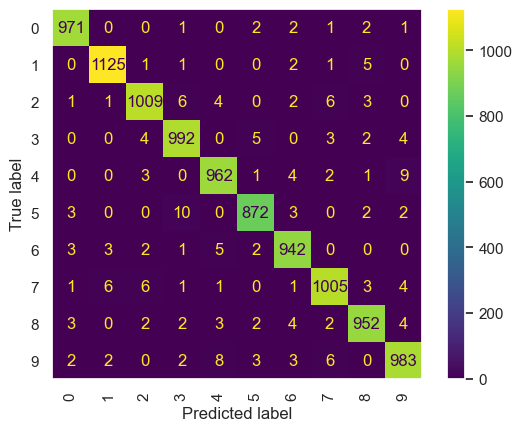

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model_FNN.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
    for X,y in test_dataloader:
        X.to(device)
        test_predictions += [model_FNN(X.to(device)).argmax(1)]
        test_labels += [y]
test_predictions = torch.cat(test_predictions)
test_labels = torch.cat(test_labels)

c_mat = confusion_matrix(test_labels, test_predictions.cpu())
ConfusionMatrixDisplay(c_mat).plot(xticks_rotation='vertical')
ax = plt.gca()
ax.grid(False)
plt.show()

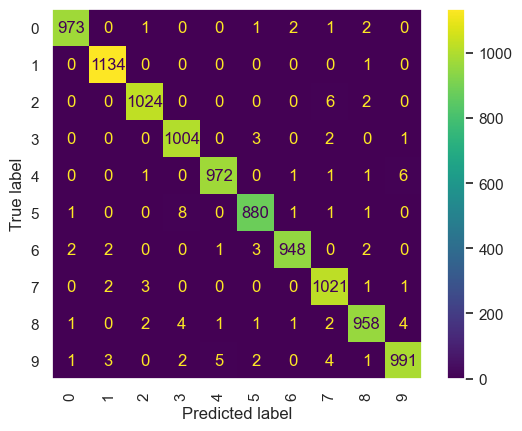

In [21]:
model_CNN.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
    for X,y in test_dataloader:
        X.to(device)
        test_predictions += [model_CNN(X.to(device)).argmax(1)]
        test_labels += [y]
test_predictions = torch.cat(test_predictions)
test_labels = torch.cat(test_labels)

c_mat = confusion_matrix(test_labels, test_predictions.cpu())
ConfusionMatrixDisplay(c_mat).plot(xticks_rotation='vertical')
ax = plt.gca()
ax.grid(False)
plt.show()

They have somehwat similar performance but the CNN does perform better. The biggest confusion is 3 and 5 for both models. 4 and 9 is the second most confused. Though the occurences of both these confusions are very small compared to the correctly labeled numbers. 